In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part1: Simple Random Forest

In [2]:
df = pd.read_csv("C://Users//rd//Documents//UDEMY/DATA/penguins_size.csv")
df.shape

(344, 7)

In [3]:
df = df.dropna()

In [4]:
df.shape

(334, 7)

In [5]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [6]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)

In [7]:
X.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0         False              True       False      True  
1         False              True        True     False  
2         False              True        True     False  
4         False              True        True     False  
5         False              True       False      True

In [8]:
# Exercise
con = pd.Series(list('abcba'))
print(pd.get_dummies(con))

       a      b      c
0   True  False  False
1  False   True  False
2  False  False   True
3  False   True  False
4   True  False  False


In [9]:
print("df:", df.shape, "X:", X.shape)

df: (334, 7) X: (334, 8)


In [10]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_FEMALE',
       'sex_MALE'],
      dtype='object')

In [11]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [13]:
y = df["species"]

In [14]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=10, 
                             max_features='sqrt', 
                            random_state=101)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [20]:
preds = rfc.predict(X_test)

In [21]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [26]:
cm = confusion_matrix(y_test, preds, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

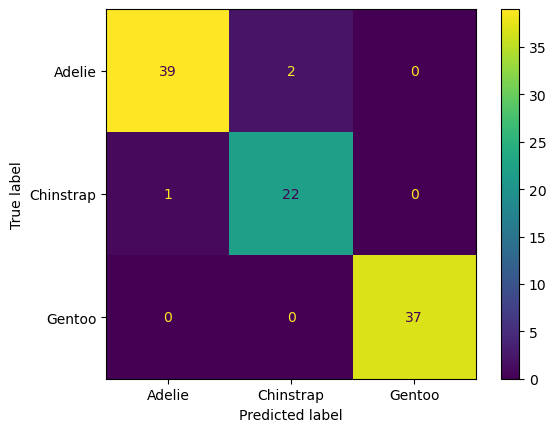

In [28]:
disp.plot()
plt.show()

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



### Part2: RF with Grid Dearch: Effect of Hyper parameters 

In [30]:
df = pd.read_csv("C://Users//rd//Documents//UDEMY/DATA/data_banknote_authentication.csv")
df.shape

(1372, 5)

In [31]:
df.head()

Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


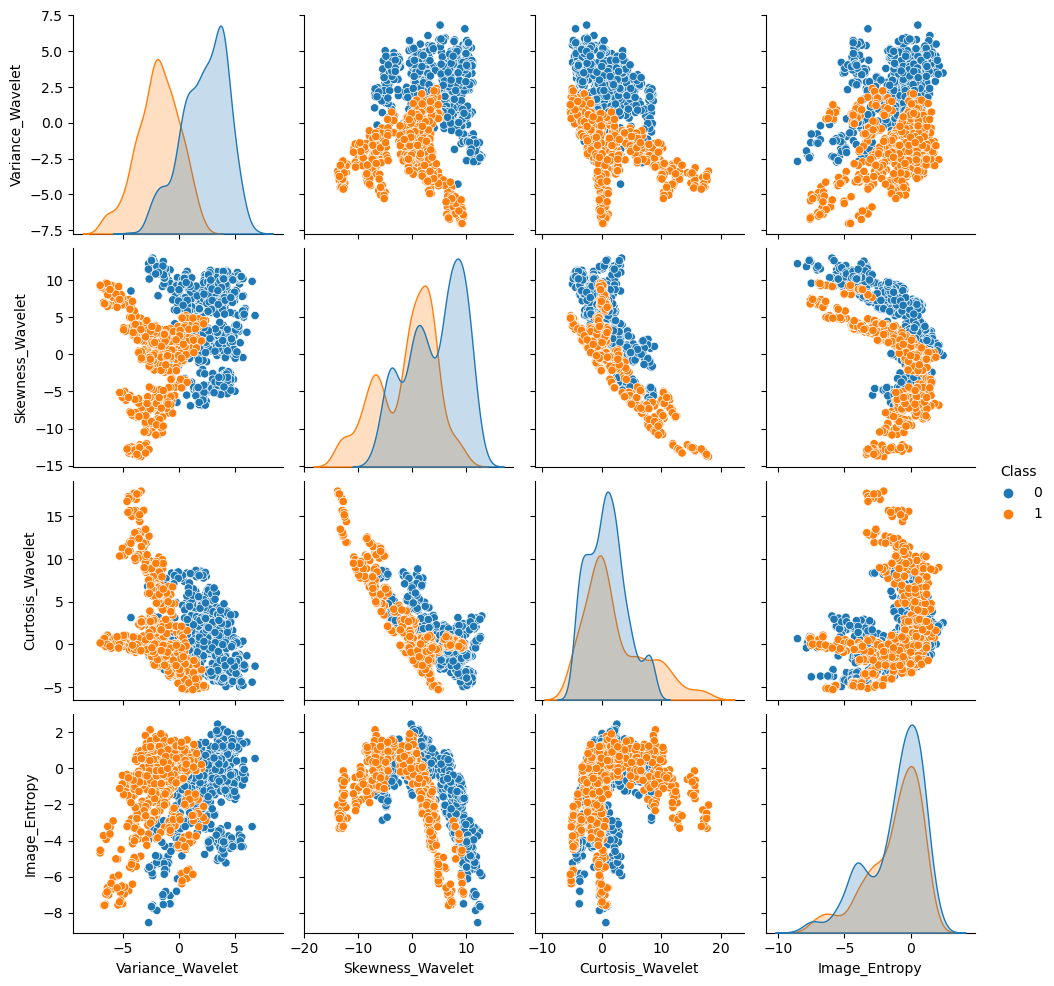

In [33]:
sns.pairplot(df, hue="Class")

In [34]:
X = df.drop("Class", axis=1)

In [36]:
X.shape

(1372, 4)

In [37]:
y = df["Class"]

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
n_estimators = [64, 100, 128, 200]

In [111]:
max_features = [2, 4, 6]

In [109]:
bootstrap = [True, False]

In [110]:
oob_score = [True, False]

In [112]:
param_grid = {"n_estimators": n_estimators,
              "max_features": max_features,
             "bootstrap":bootstrap,
             "oob_score":oob_score}

In [113]:
rfc = RandomForestClassifier()

In [115]:
grid = GridSearchCV(rfc, param_grid)

In [116]:
rfc = RandomForestClassifier()

In [117]:
grid = GridSearchCV(rfc, param_grid)

In [119]:
grid.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    raise ValueError

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 4, 6],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [120]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [121]:
rfc = RandomForestClassifier(n_estimators=100, max_features=2, bootstrap=True, oob_score=True)

In [122]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [123]:
rfc.oob_score

True

In [126]:
rfc.oob_score_

0.9939965694682675

In [127]:
predictions = rfc.predict(X_test)

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [129]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



In [131]:
class_report = classification_report(y_test, predictions)

In [134]:
type(class_report)

str

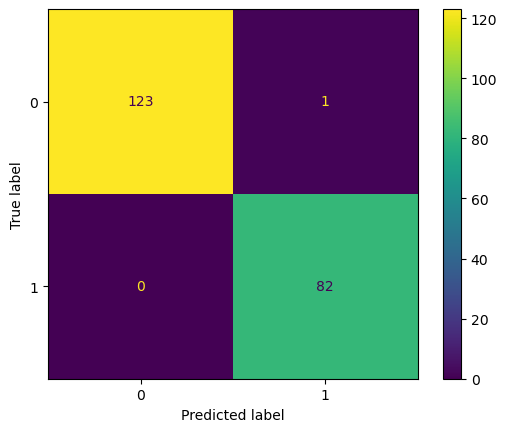

In [138]:
cm = confusion_matrix(y_test, predictions, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [140]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [141]:
predictions.shape

(206,)

In [142]:
y_test.shape

(206,)

In [144]:
np.sum(predictions != y_test)

1

In [145]:
errors = []
misclassifications = []

for i in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=i, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1-accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)
       

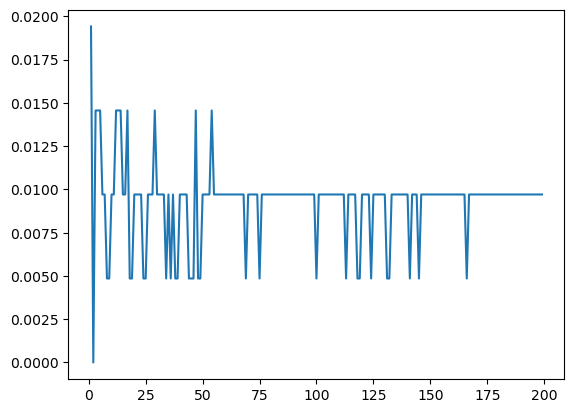

In [147]:
# Adding more tree would not help.
plt.plot(range(1, 200), errors)

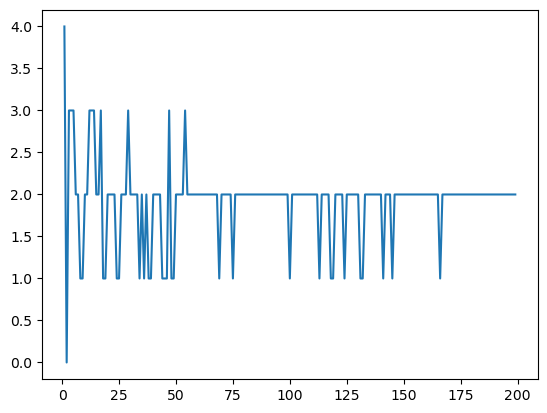

In [148]:
plt.plot(range(1, 200), misclassifications)

### RF Regression lecture Series Overview

#### Part 1: Data and Linear Regression

In [150]:
df = pd.read_csv("C://Users//rd//Documents//UDEMY/DATA/rock_density_xray.csv")
df.shape

(300, 2)

In [151]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [152]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

In [153]:
df.columns = ["Signal", "Density"]

In [154]:
df.head()

Signal   Density
0  72.945124  2.456548
1  14.229877  2.601719
2  36.597334  1.967004
3   9.578899  2.300439
4  21.765897  2.452374

<Axes: xlabel='Signal', ylabel='Density'>

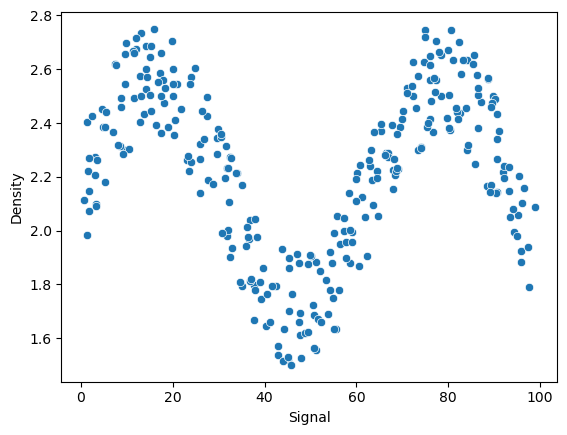

In [155]:
sns.scatterplot(x="Signal", y="Density", data=df)

In [167]:
X = df["Signal"].values.reshape(-1, 1)
y = df["Density"]

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
lr_model = LinearRegression()

In [172]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [174]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [176]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [177]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [180]:
signal_range = np.arange(0, 100)
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

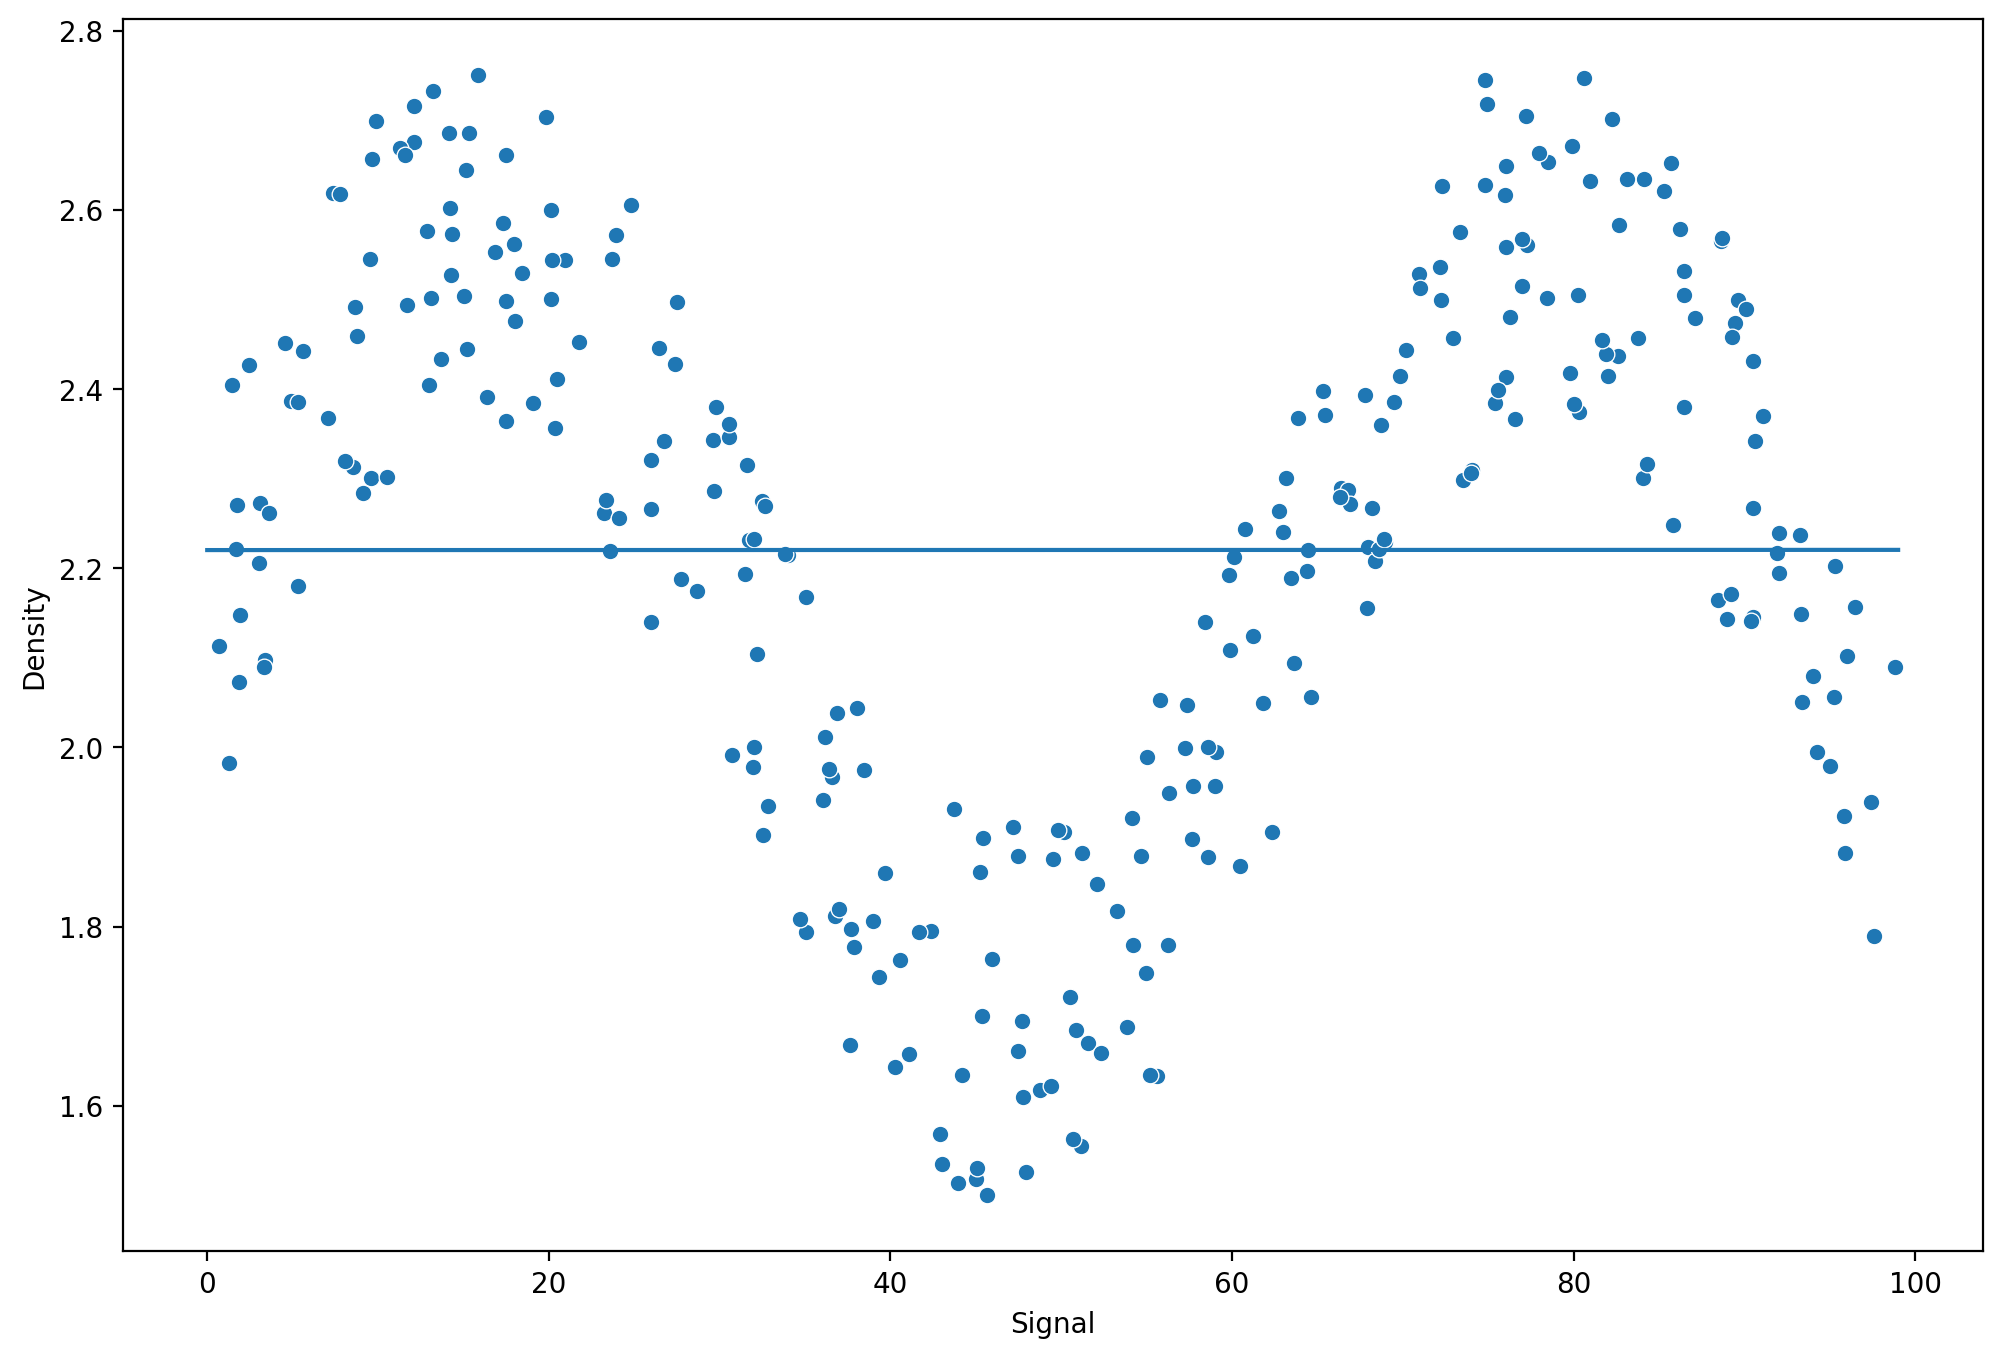

In [181]:
# LR can not fit the data, in which just show mean.
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x="Signal", y="Density", data=df)
plt.plot(signal_range, signal_preds)

#### Part 2: Data and Poly Regression

In [185]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x="Signal", y="Density", data=df, color="black")
    plt.plot(signal_range, signal_preds)    

MAE: 0.211198973318633
RMSE: 0.2570051996584629


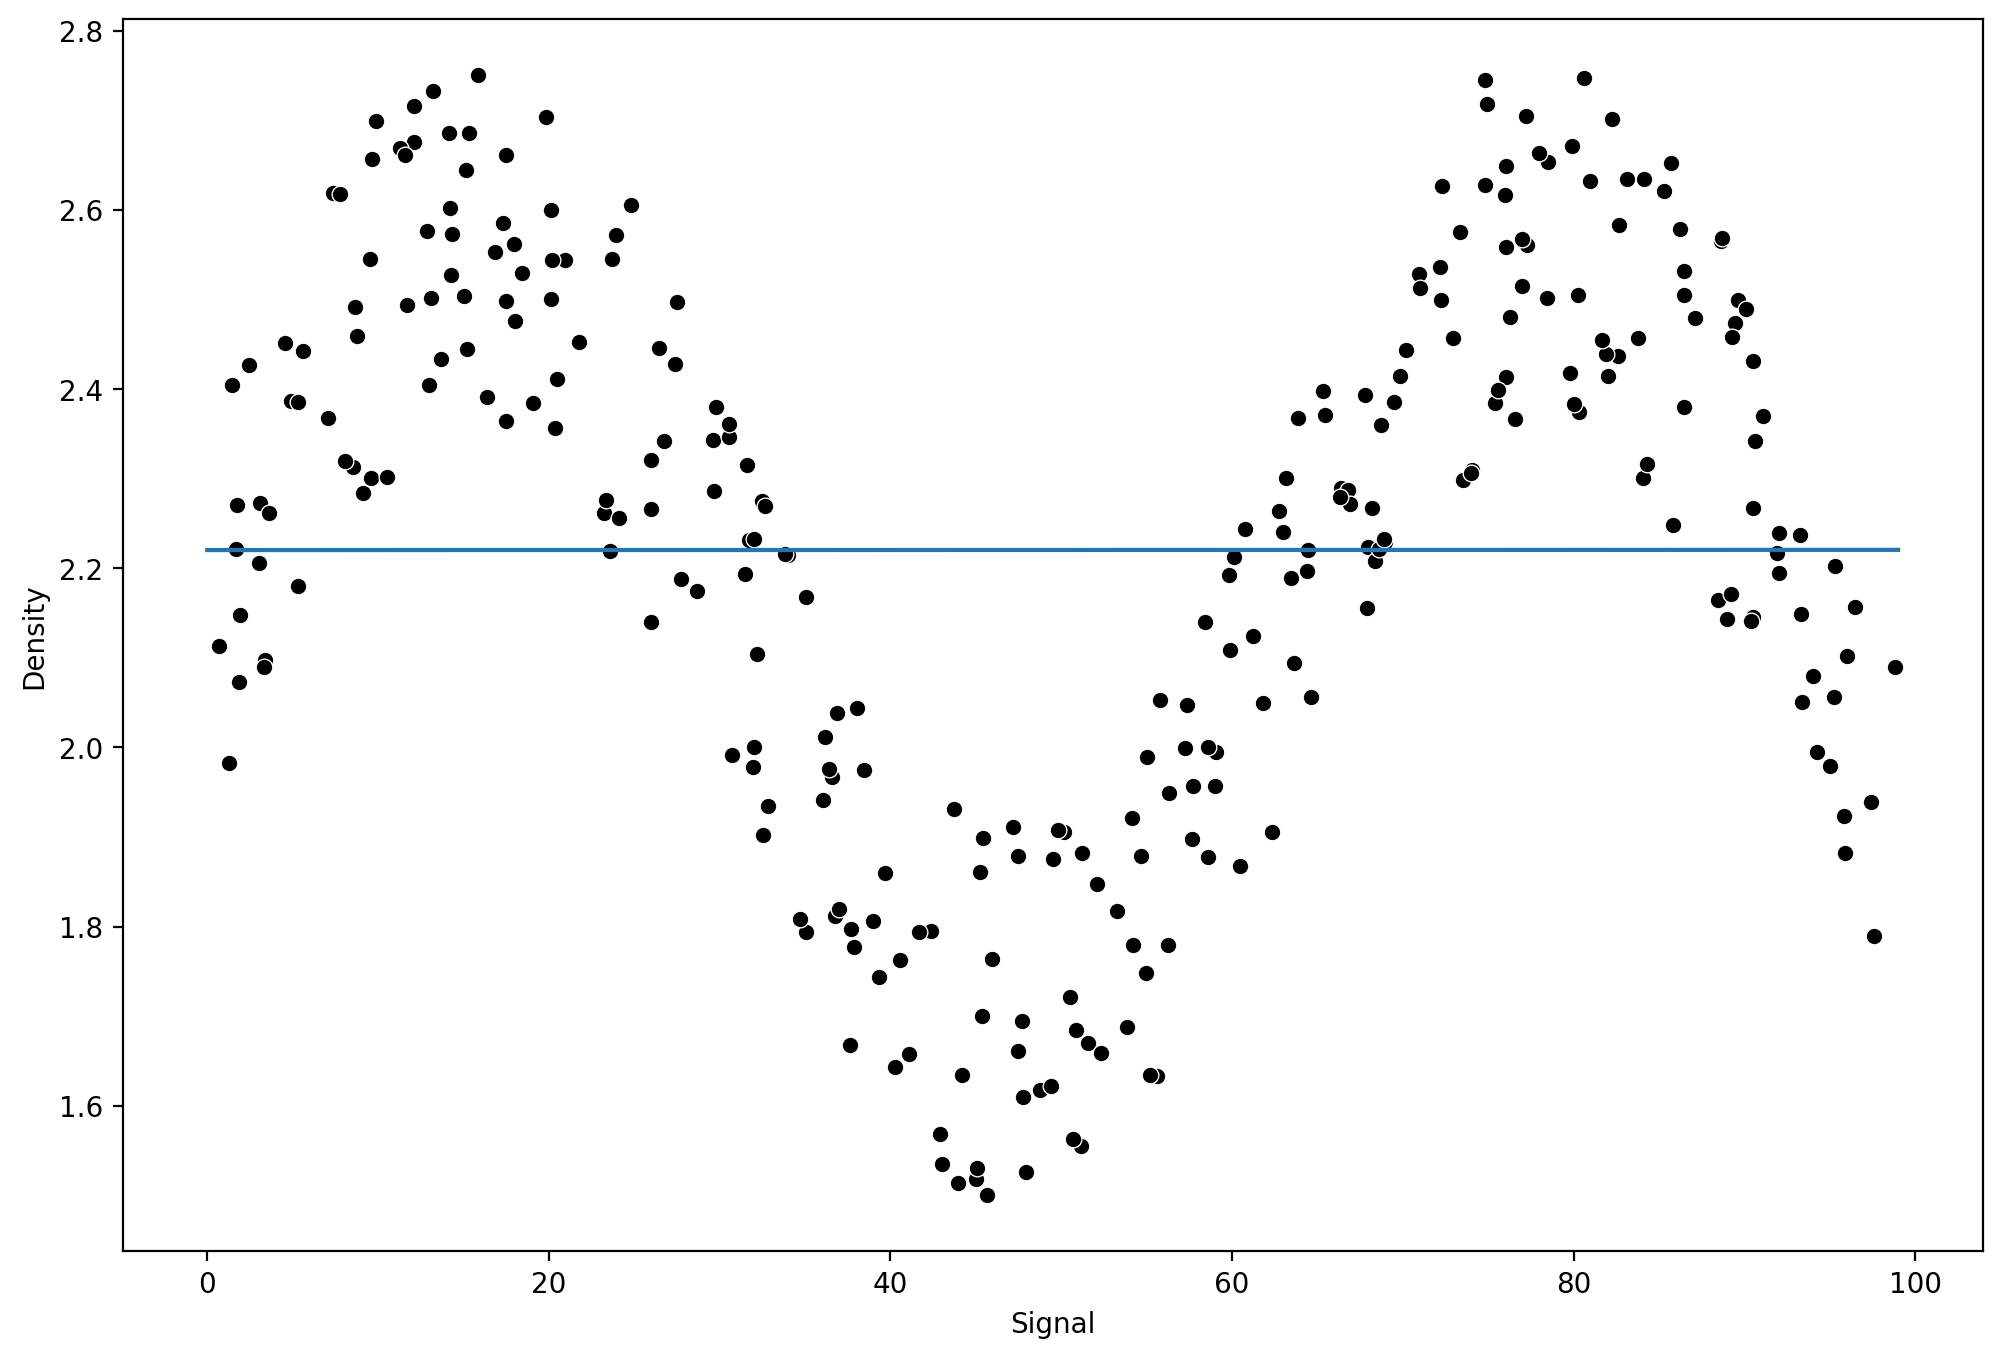

In [186]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [187]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [190]:
pipe = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

MAE: 0.1184764278190075
RMSE: 0.14588633387775765


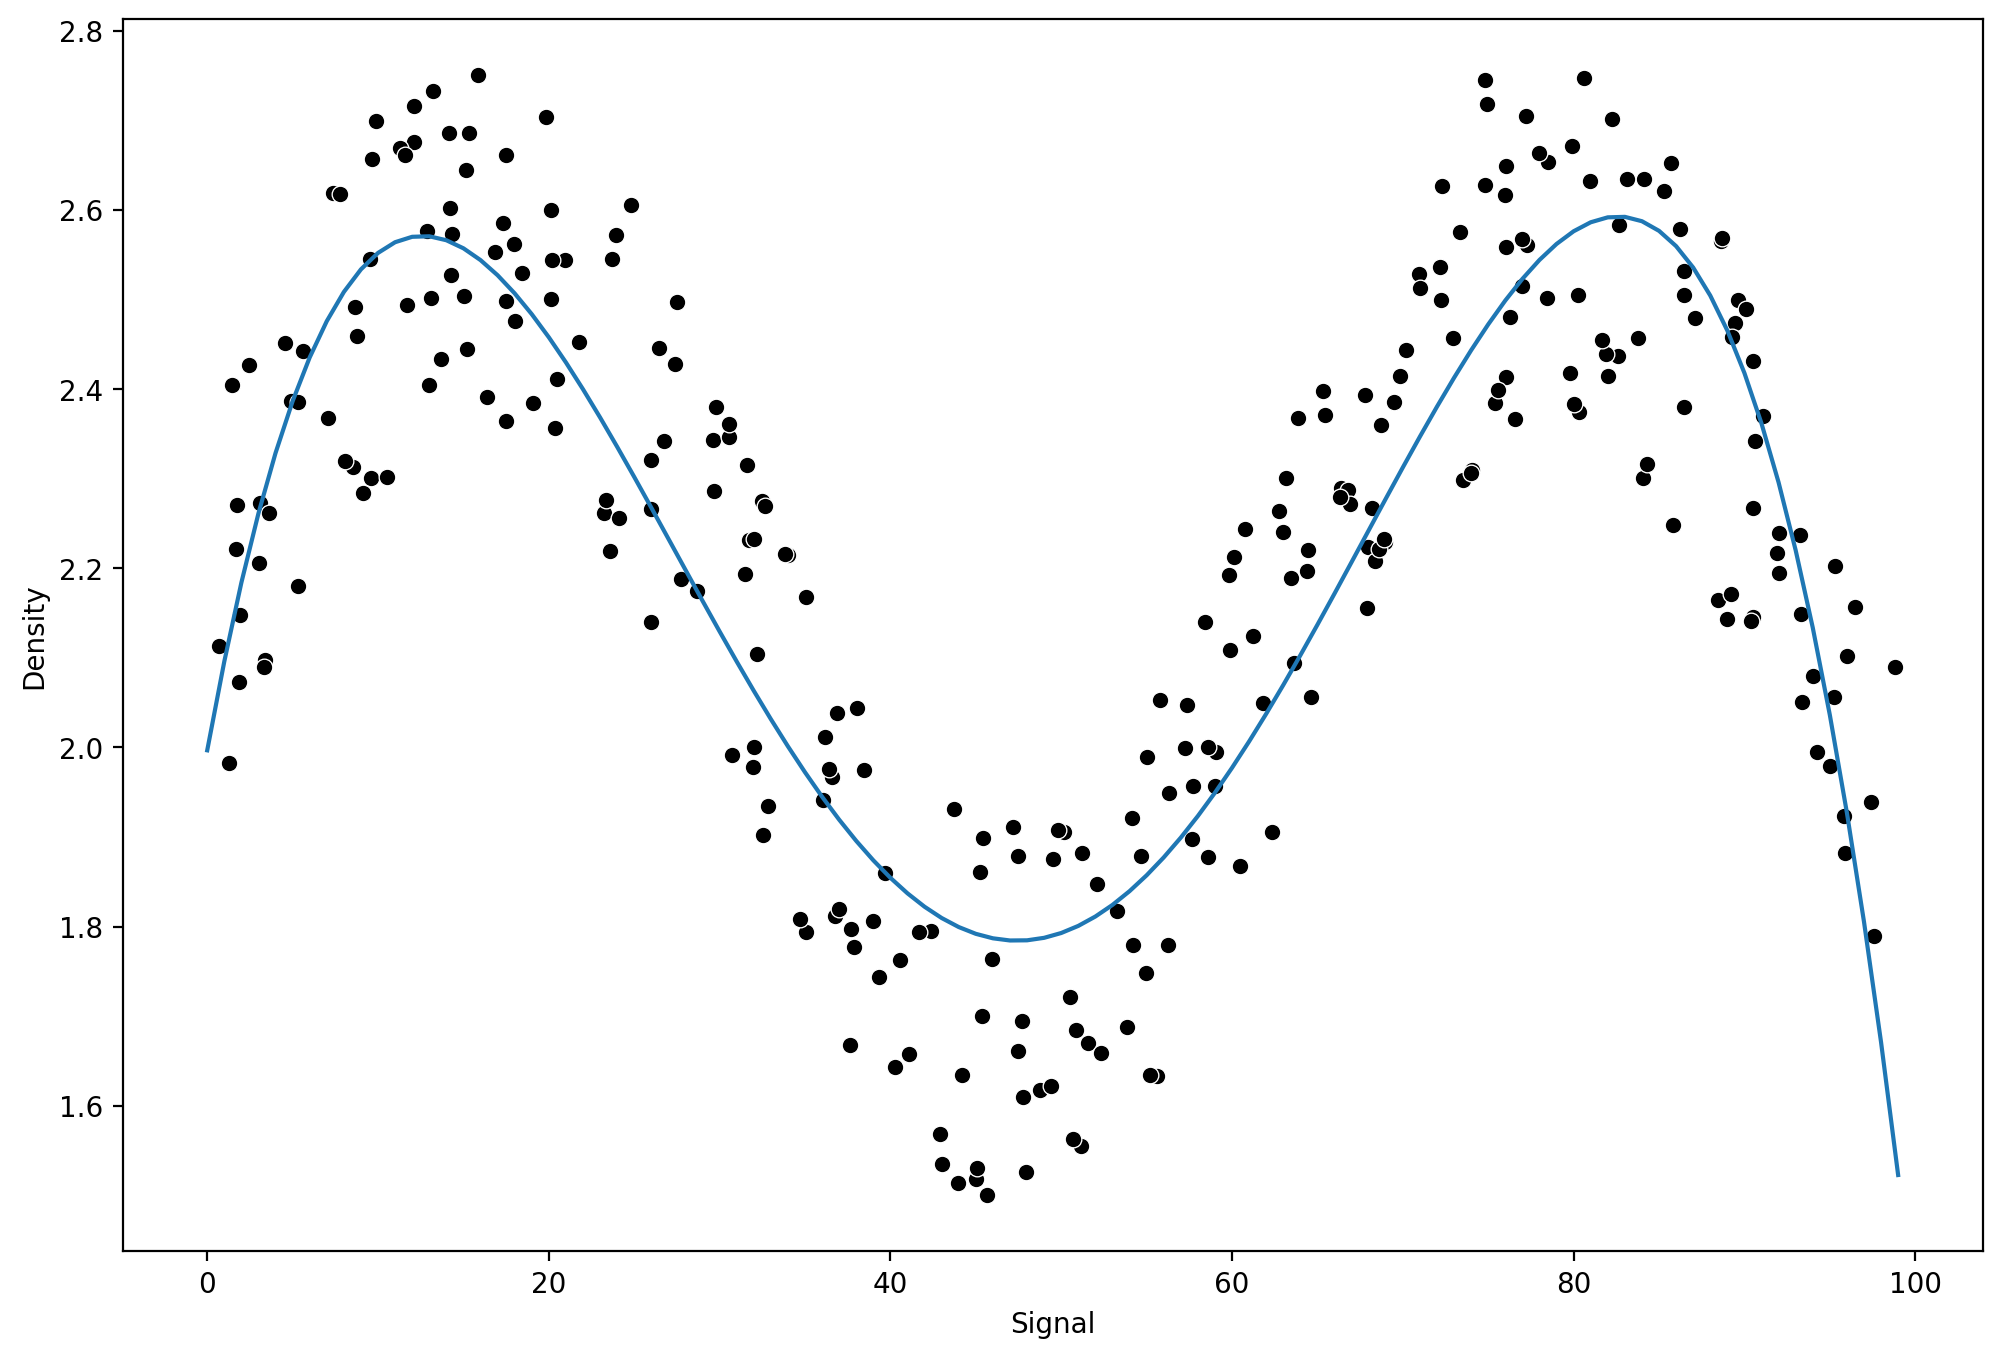

In [191]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [192]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())

MAE: 0.12467306454251856
RMSE: 0.14035228495977833


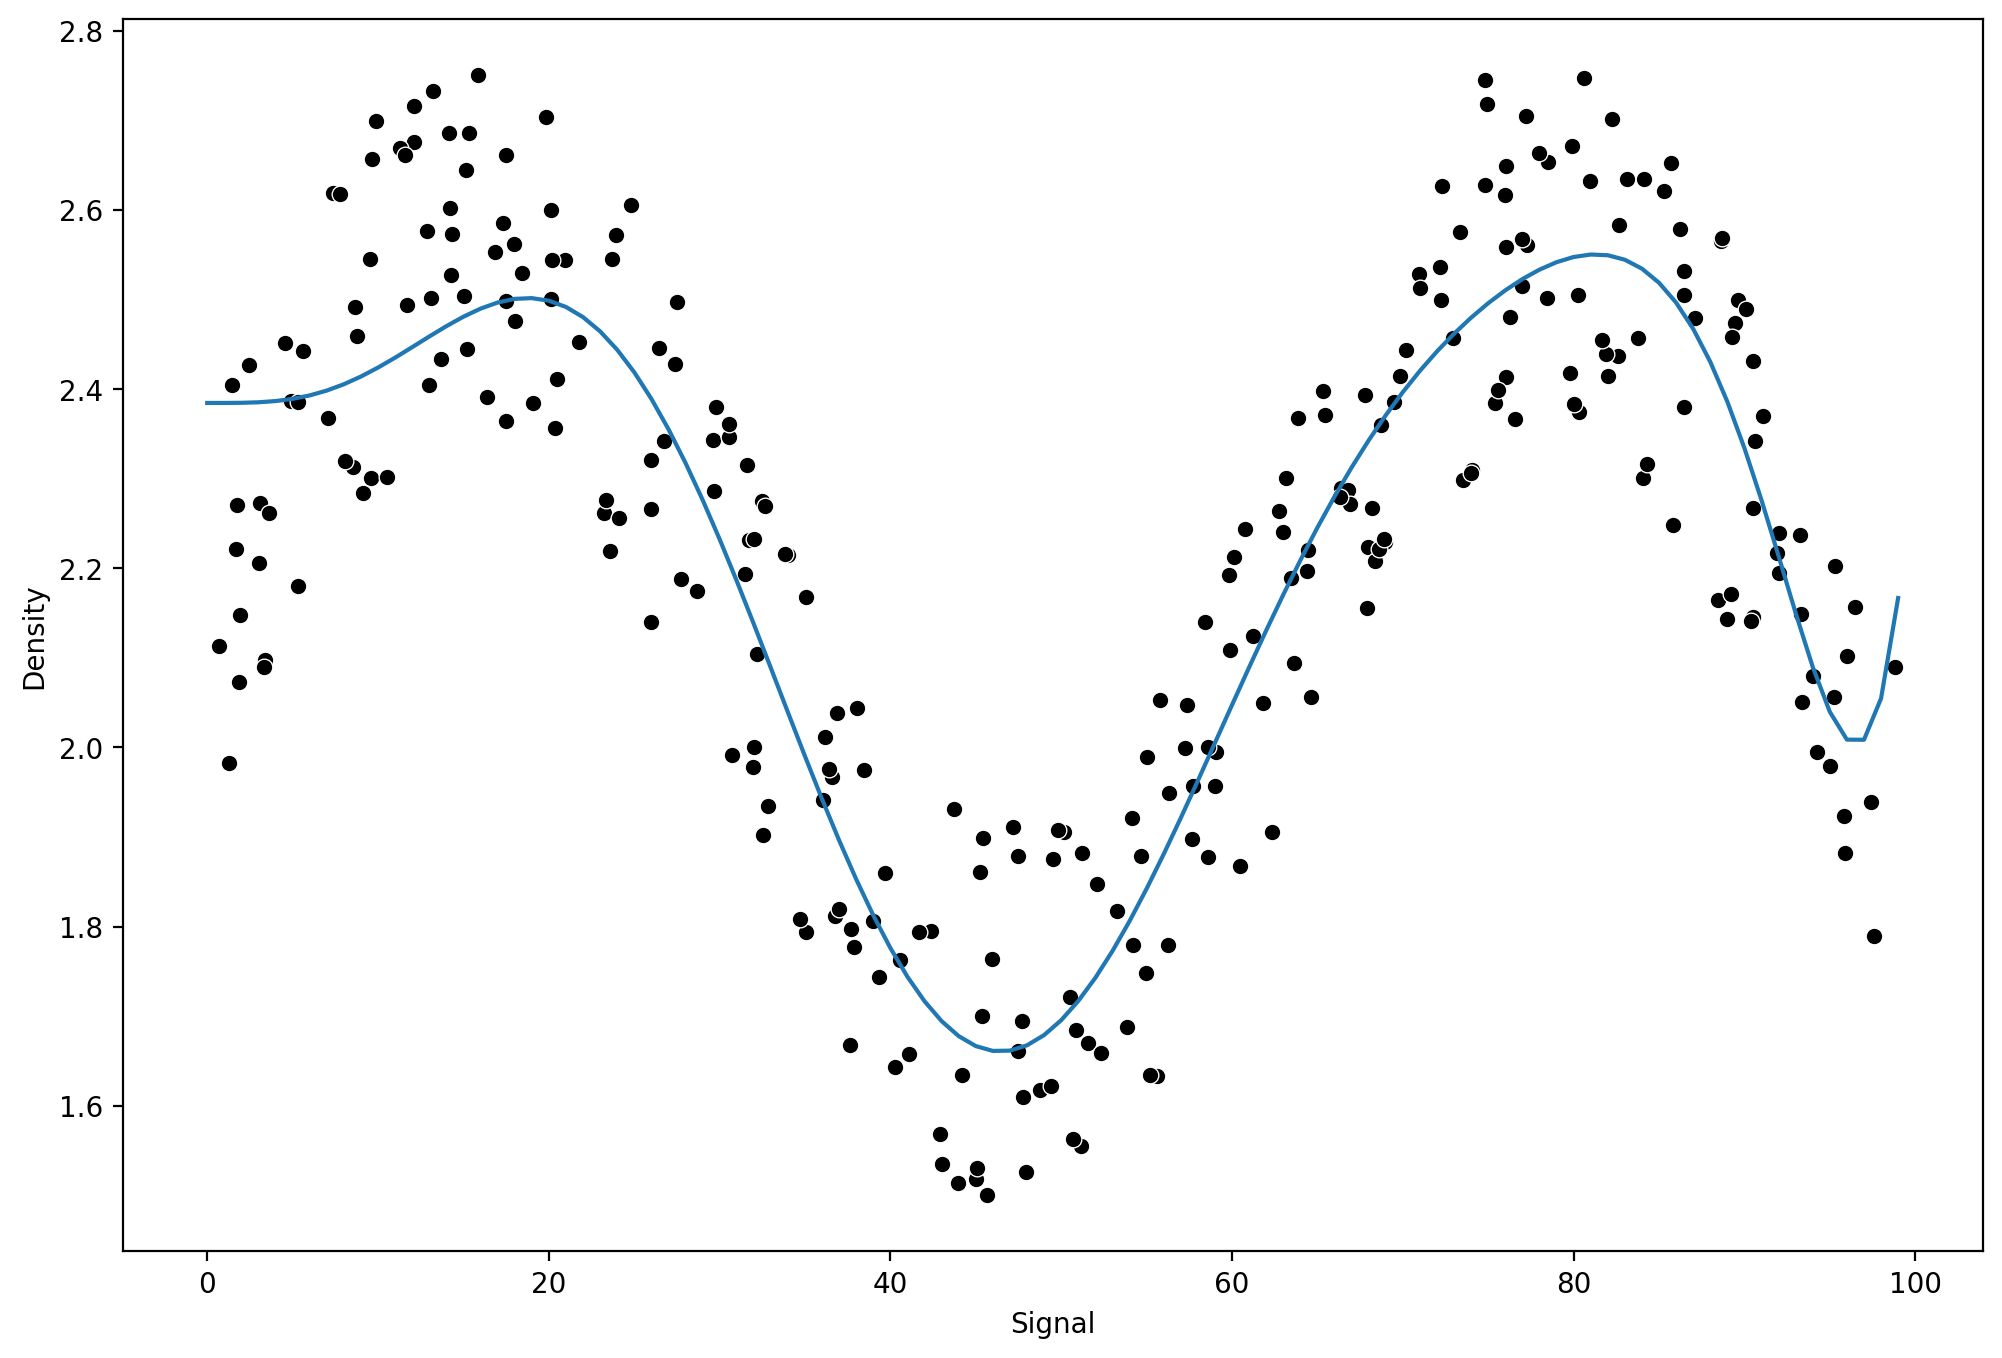

In [193]:
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.1196906578047378
RMSE: 0.13807353160523722


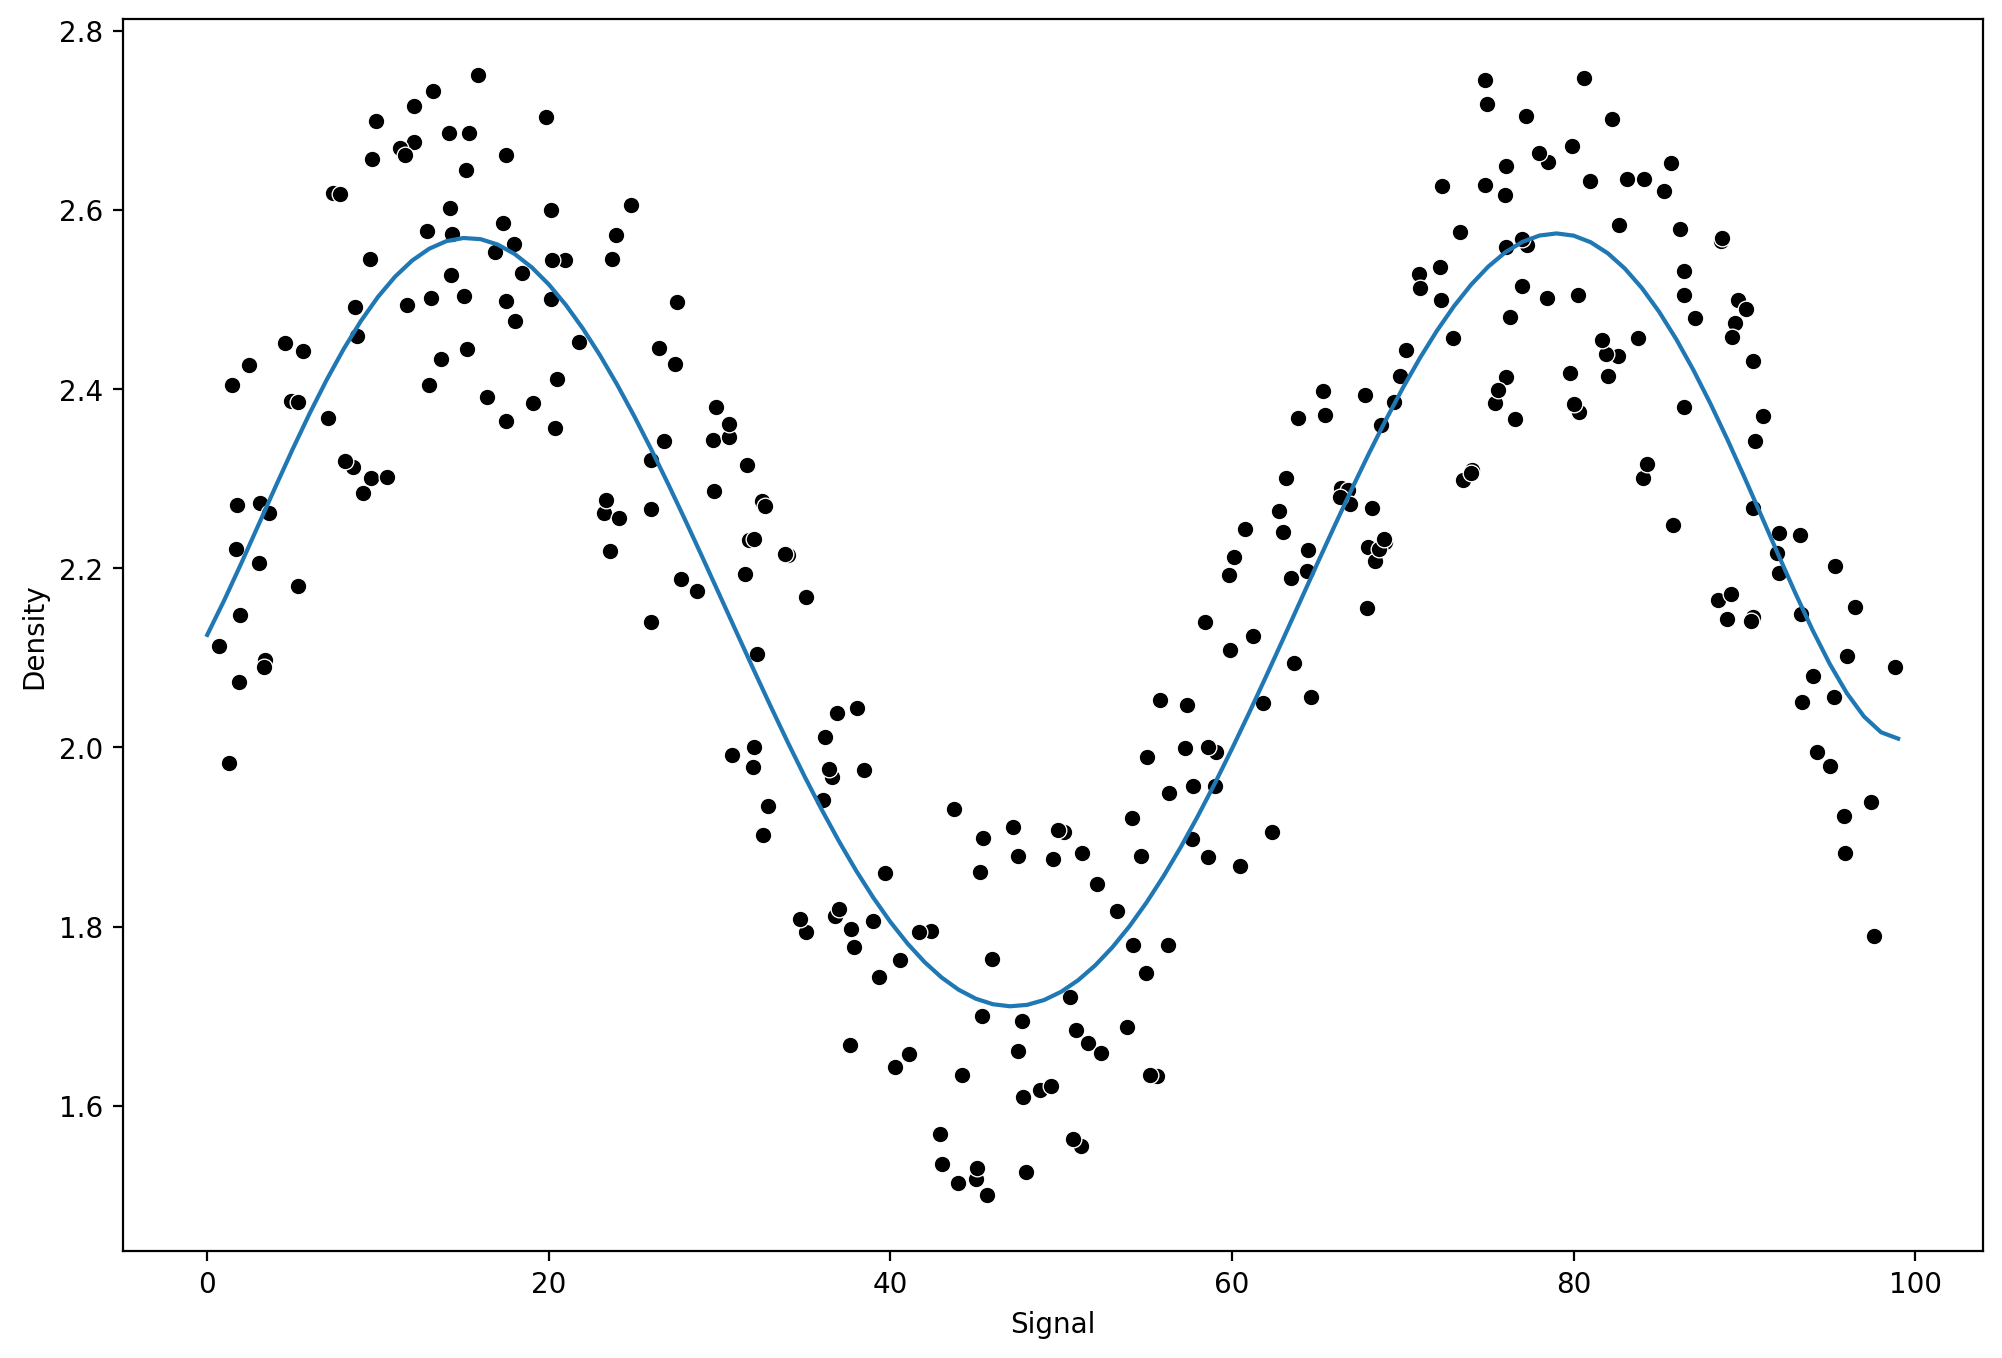

In [195]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.14577941741409922
RMSE: 0.1736462410529947


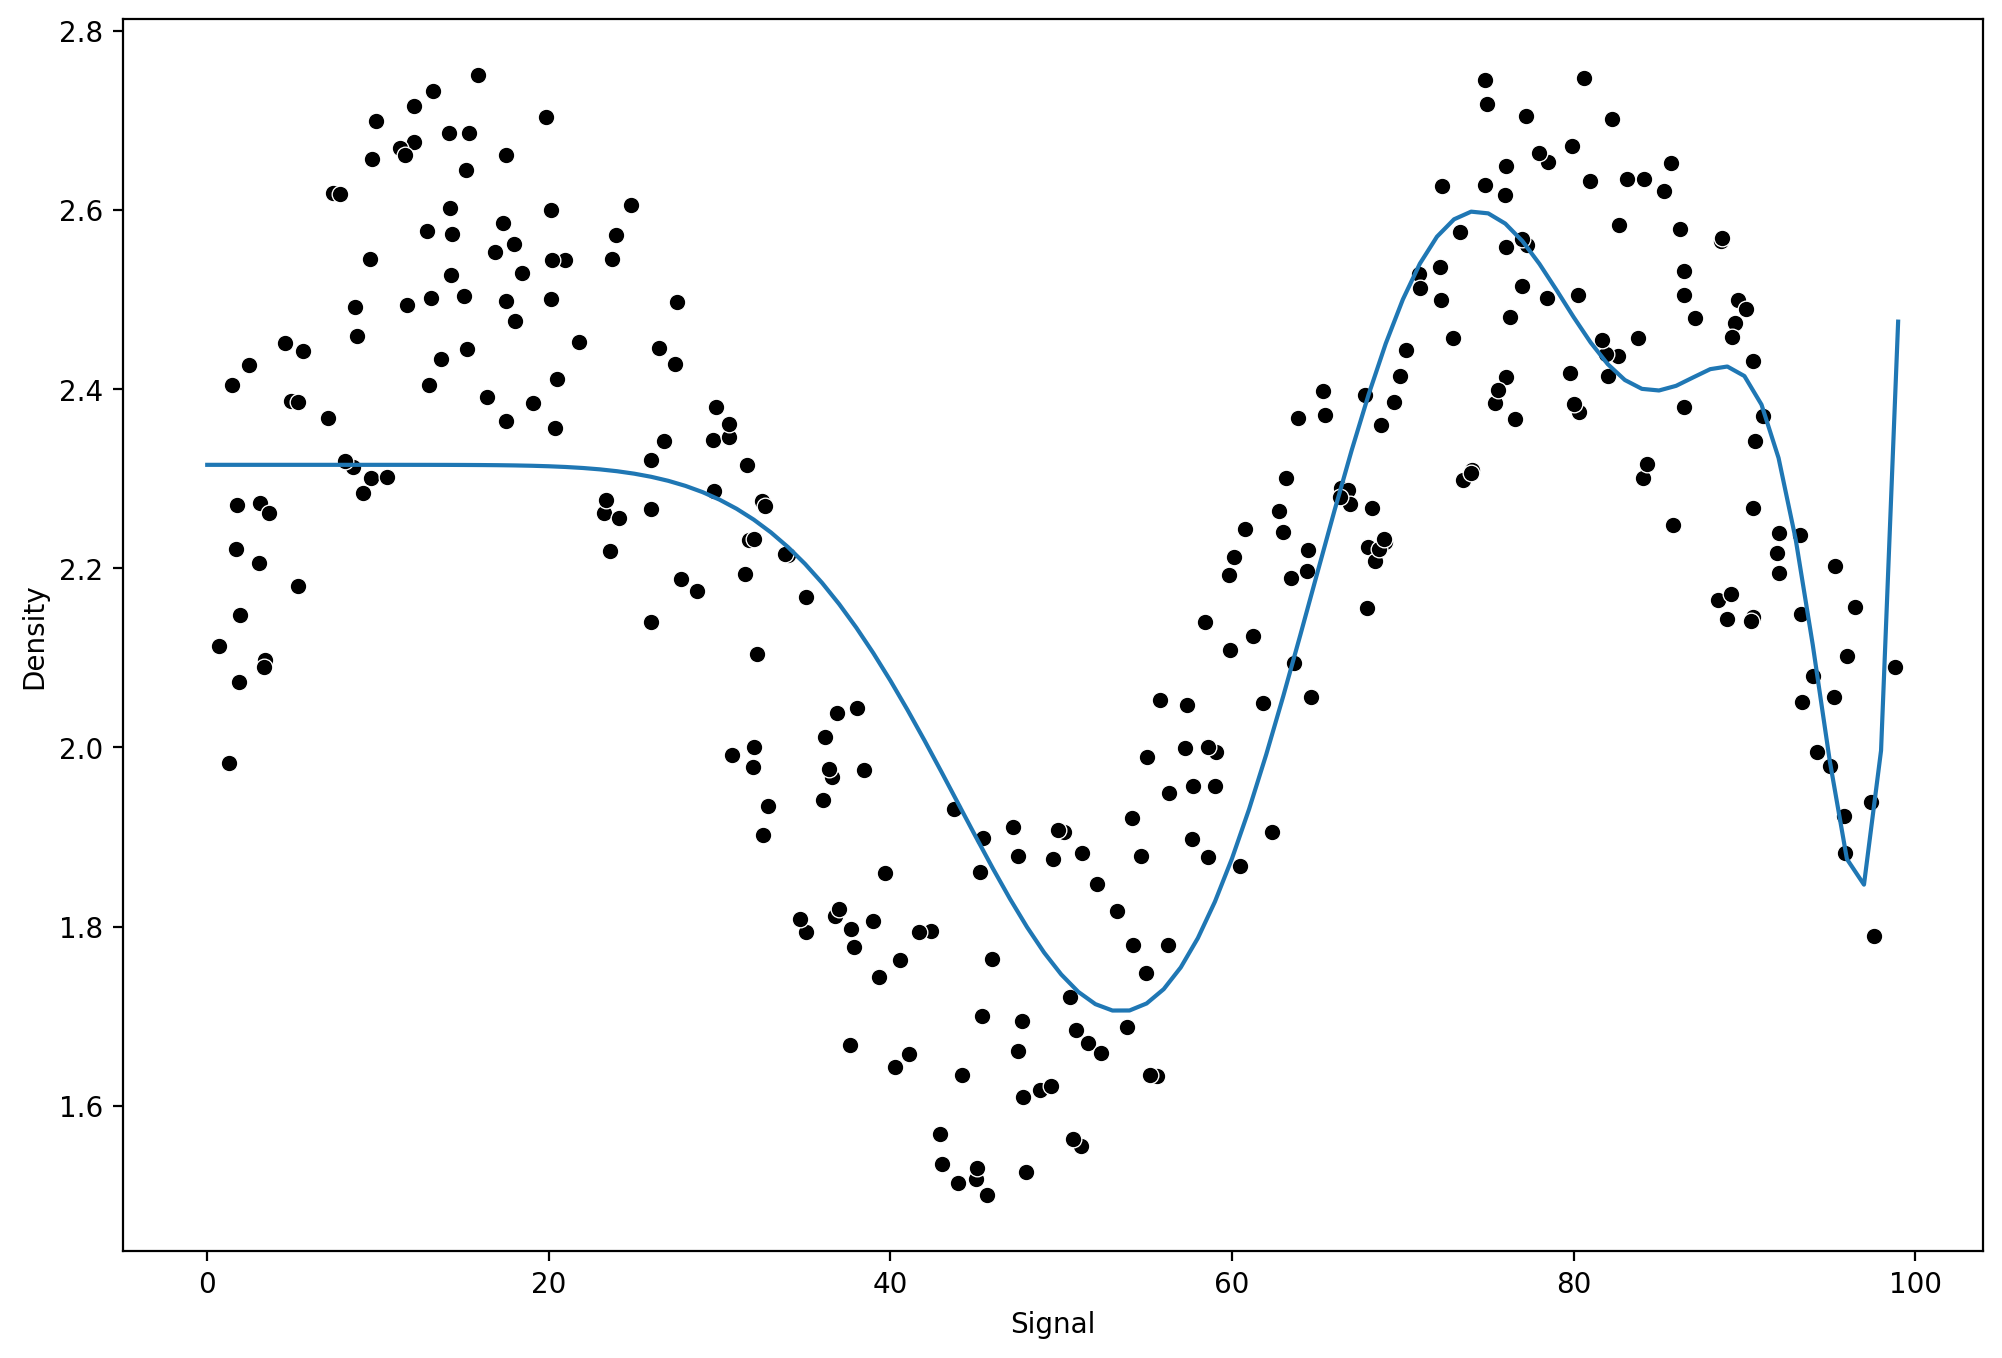

In [196]:
pipe = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

#### Part3: Advance Model

In [198]:
# What if We dont know about signal-x dimention (range) in our case x from 0 to 100
# If we dont about it. We need to KNN or something in higher level.
from sklearn.neighbors import KNeighborsRegressor

In [197]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x="Signal", y="Density", data=df, color="black")
    plt.plot(signal_range, signal_preds)   

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.11561598074223124
RMSE: 0.13351482702752904
MAE: 0.1207030971917154
RMSE: 0.1397499127378895
MAE: 0.12878322504026188
RMSE: 0.151321497164368
MAE: 0.13363165935705318
RMSE: 0.15954234753677107
MAE: 0.16671472141169144
RMSE: 0.21309029683672812


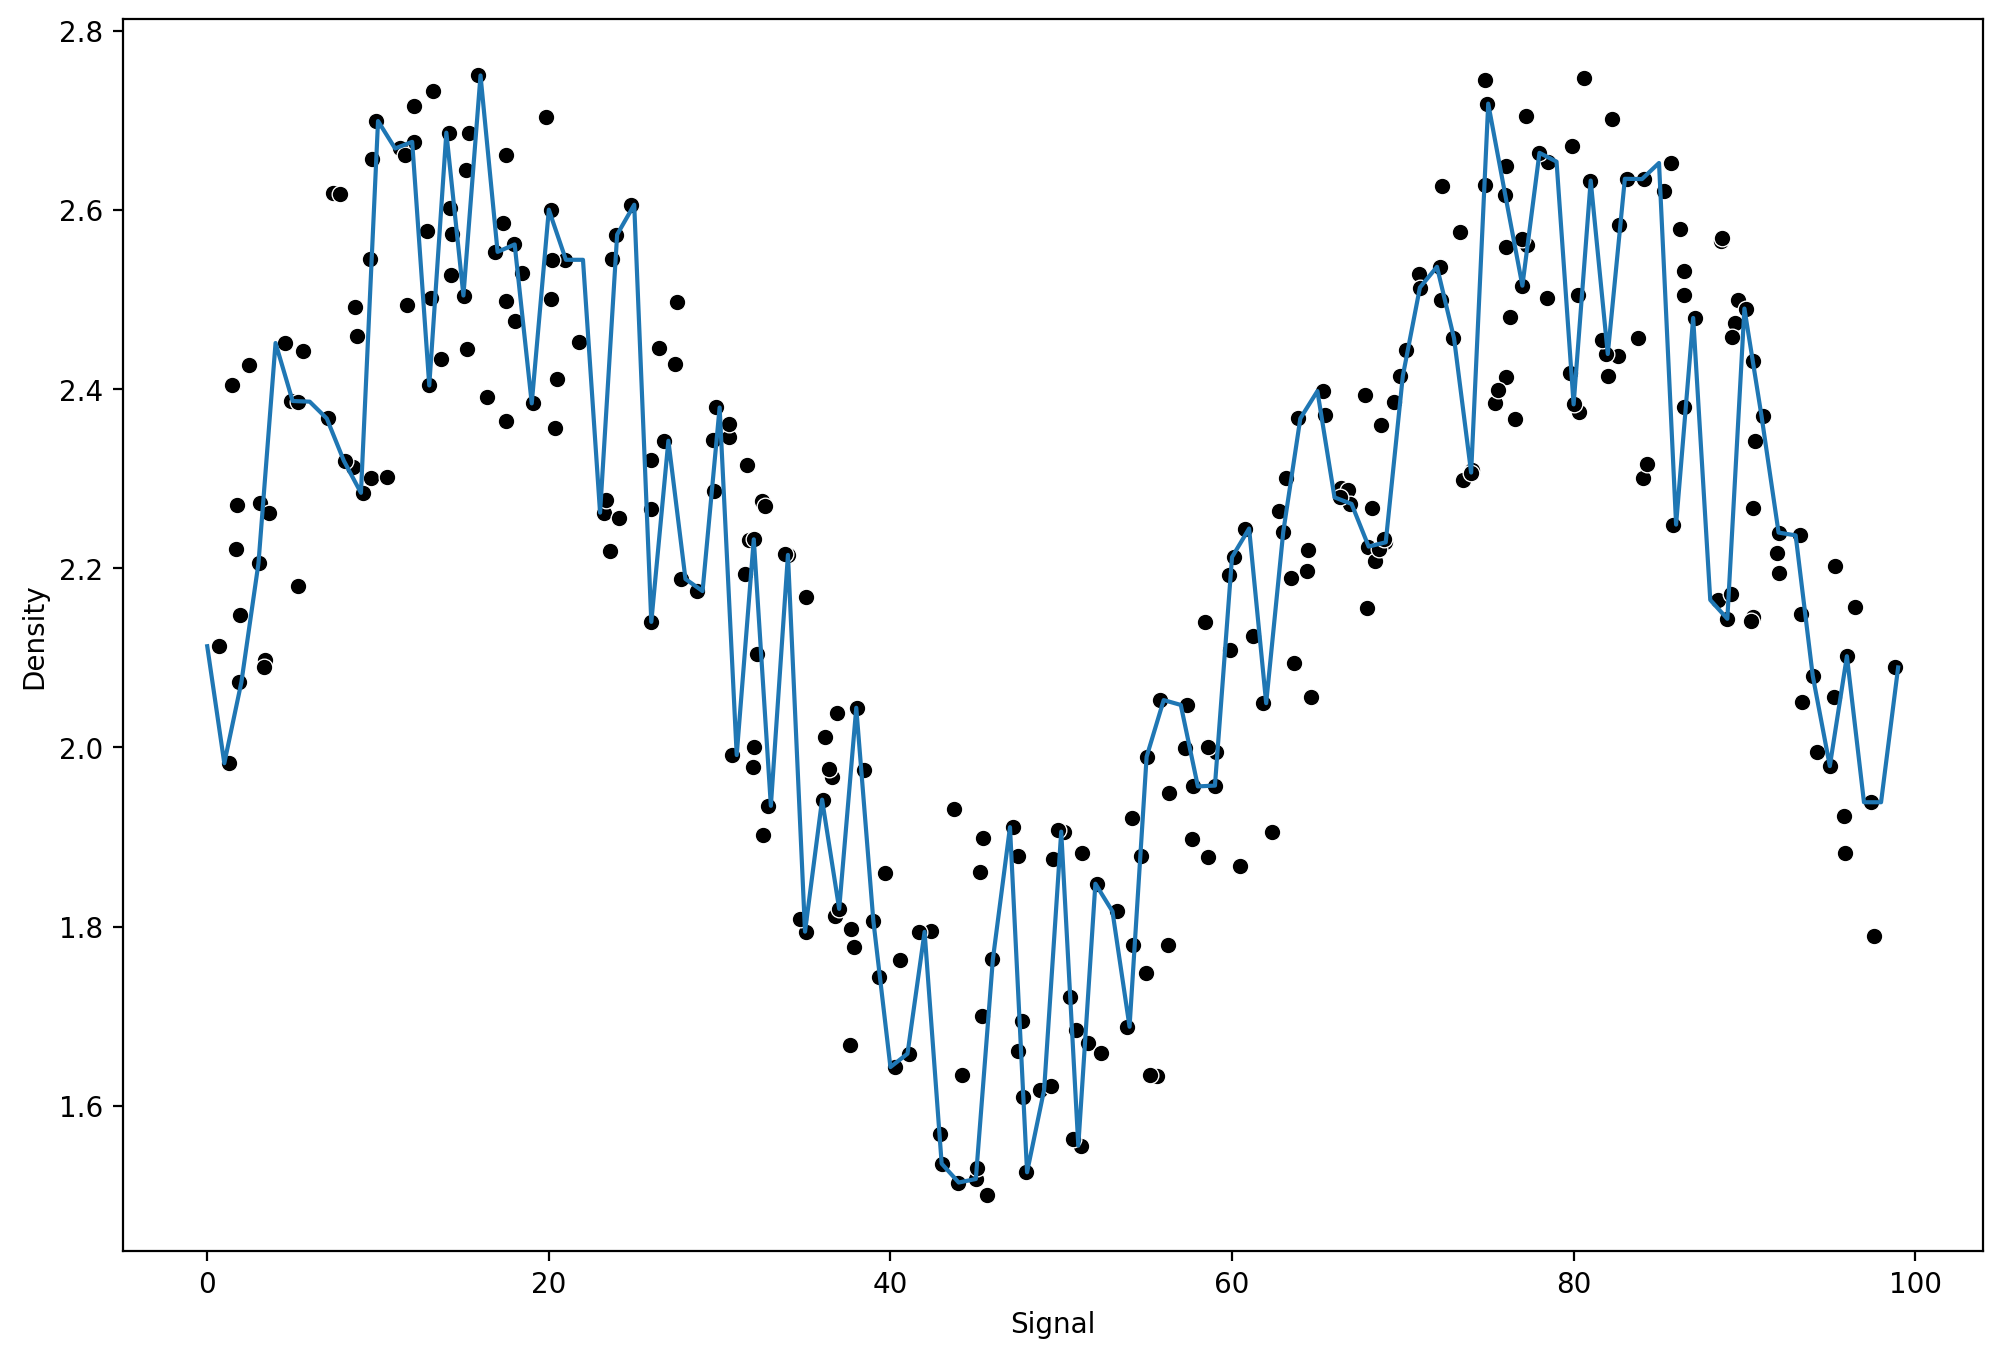

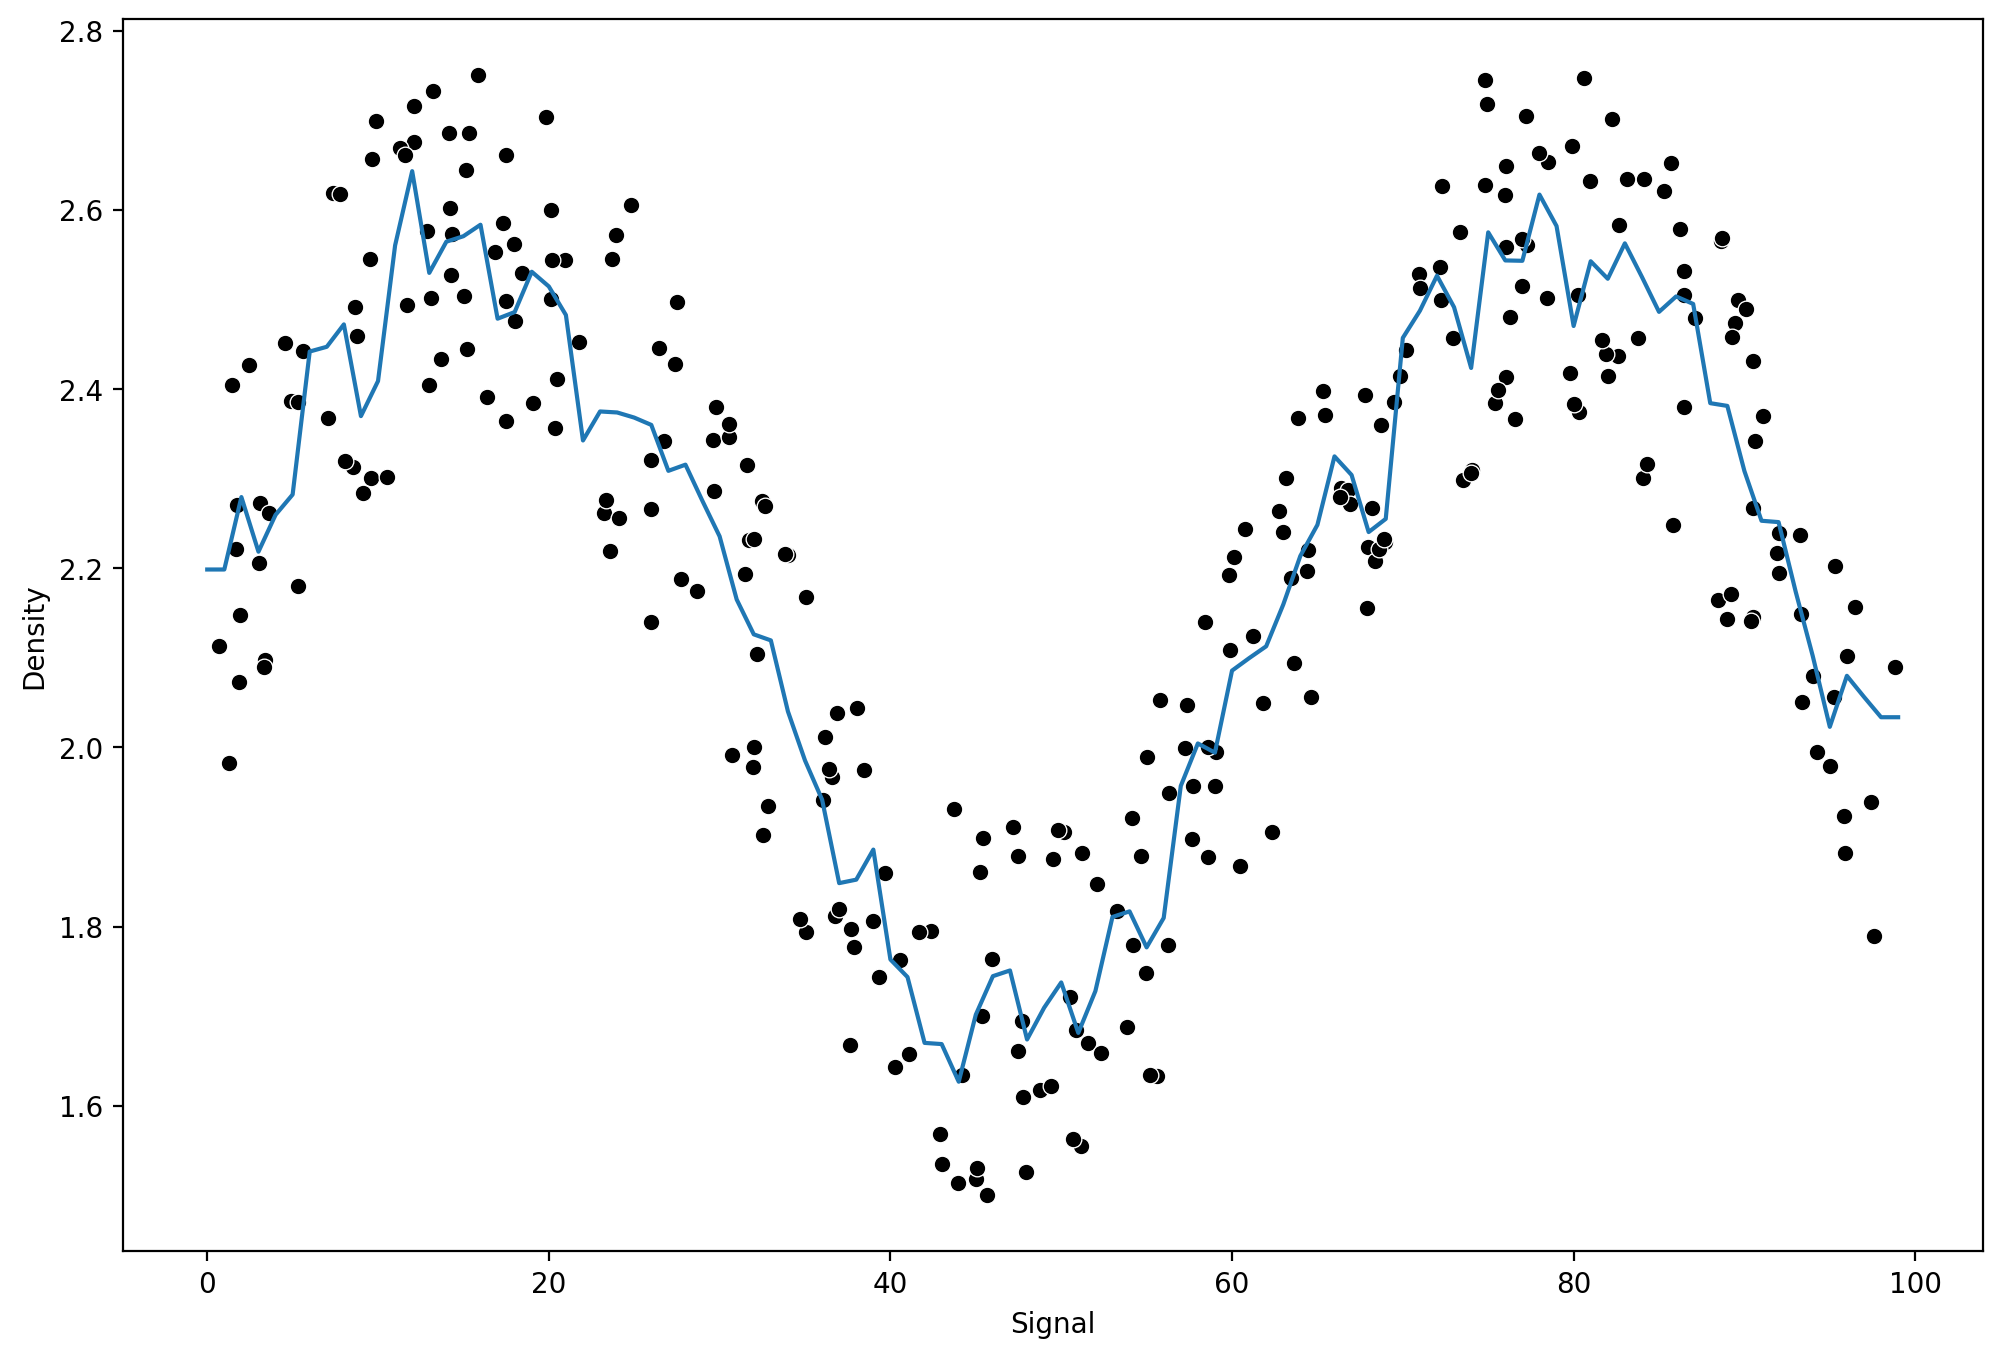

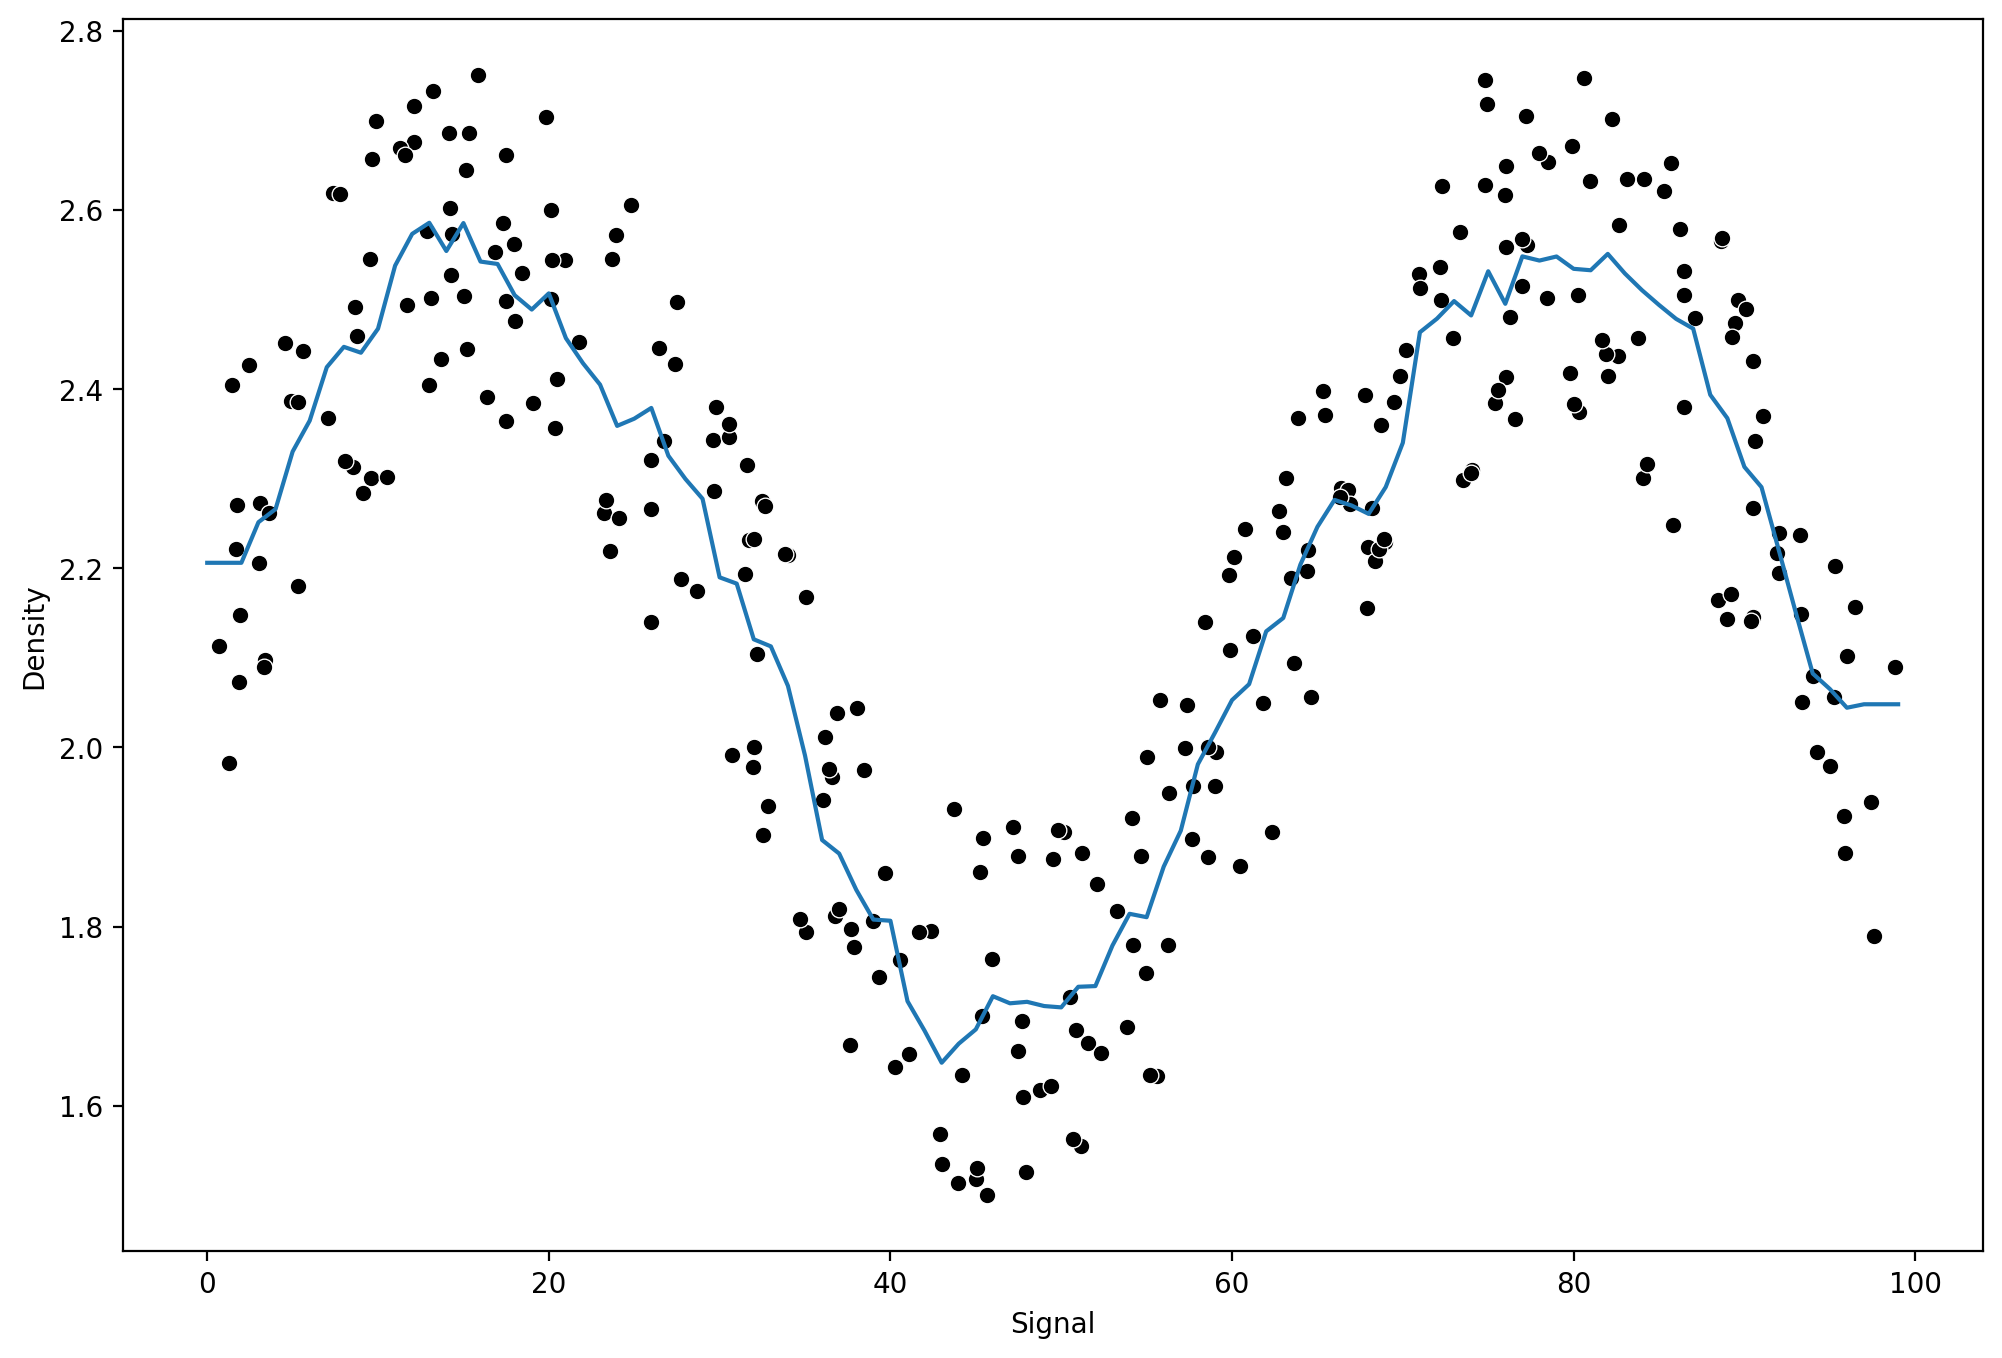

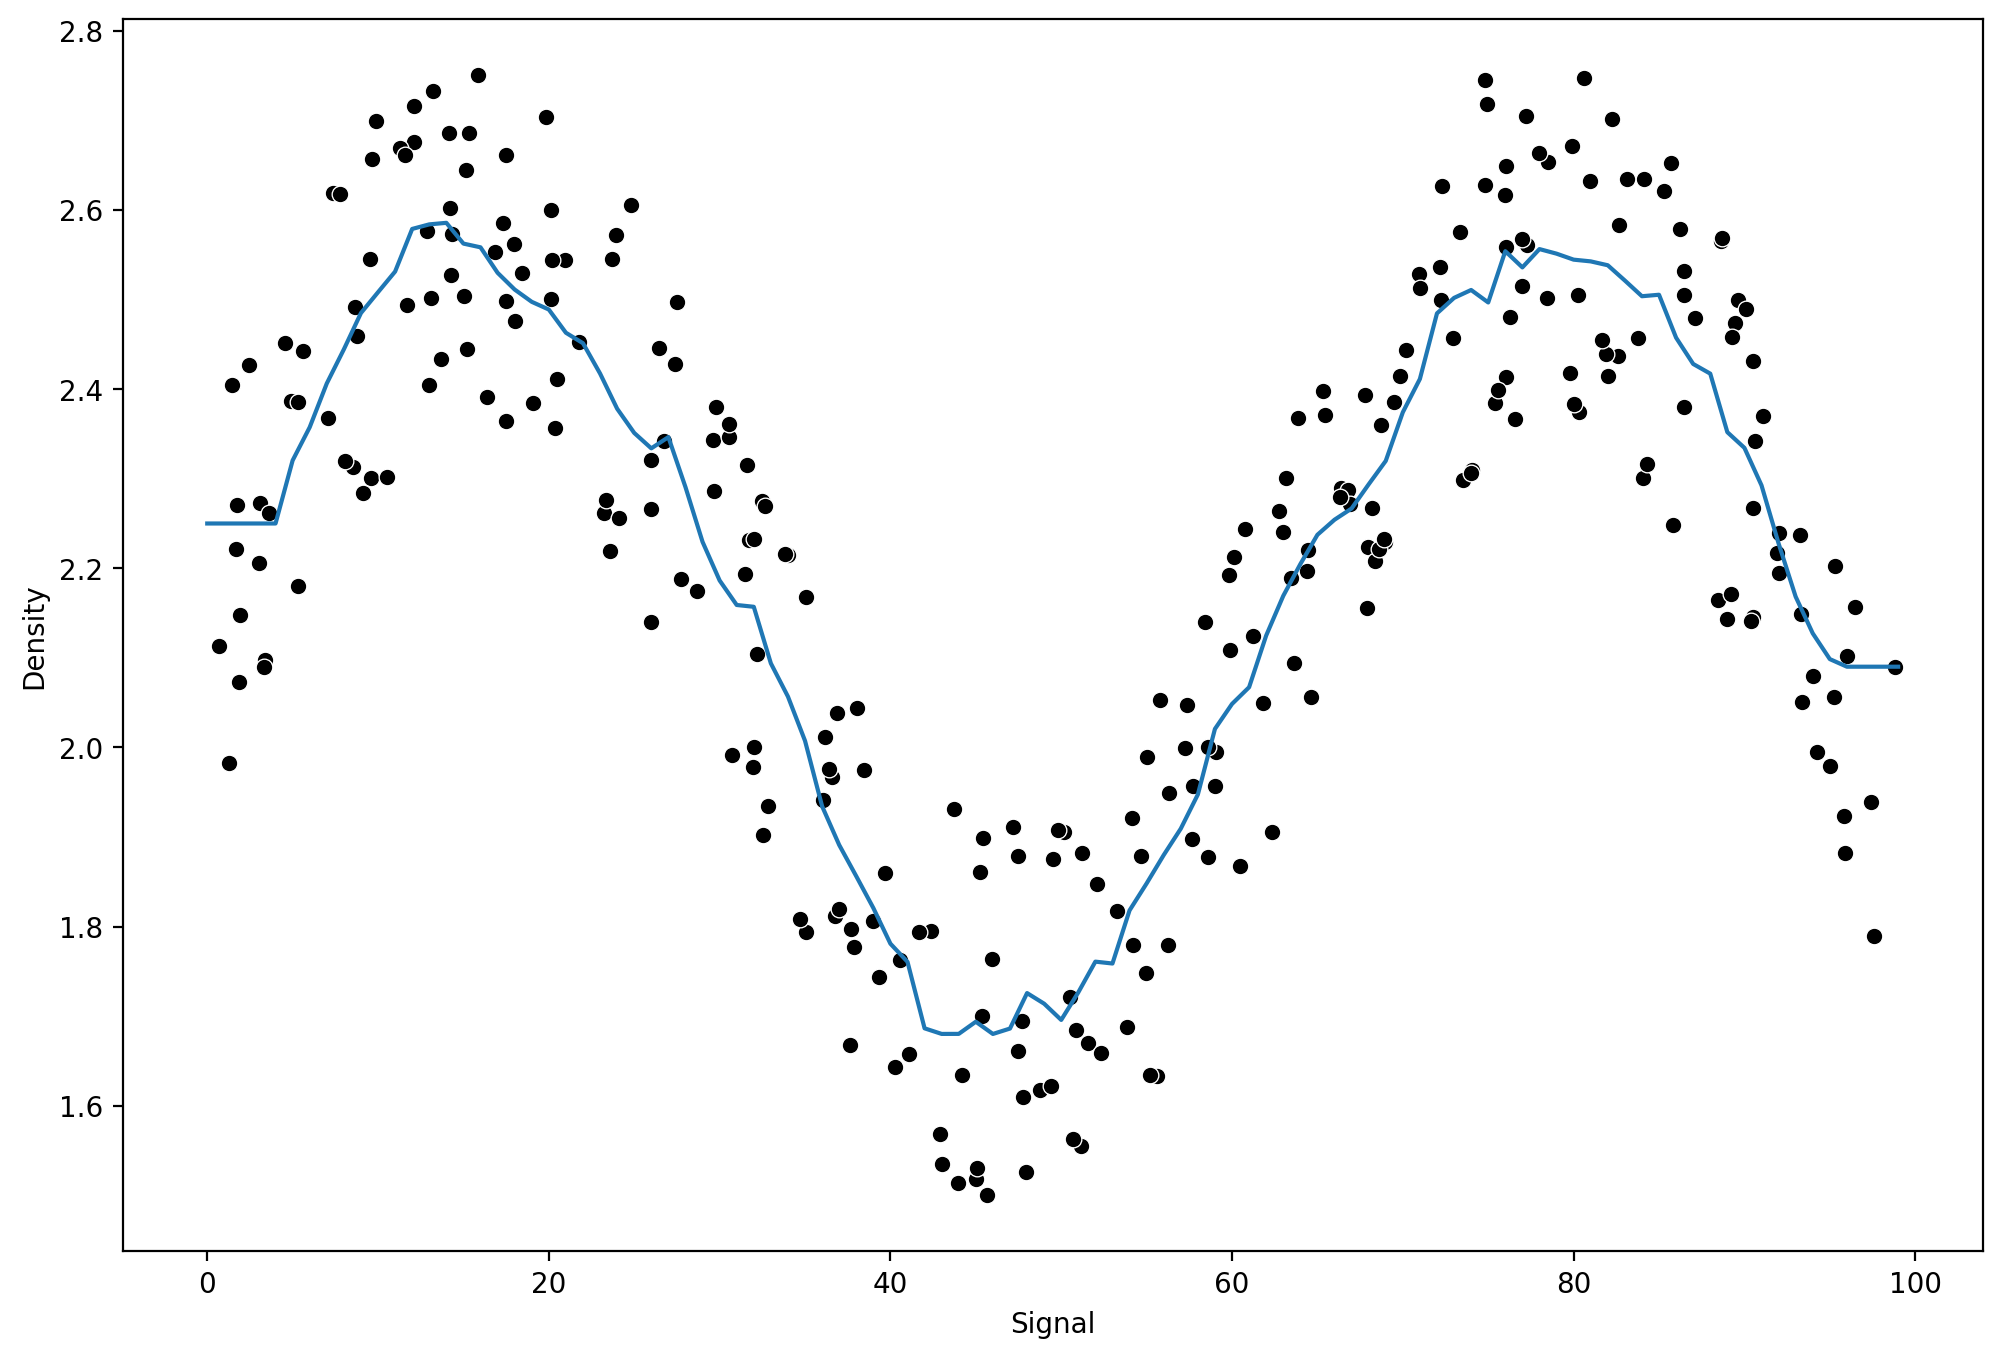

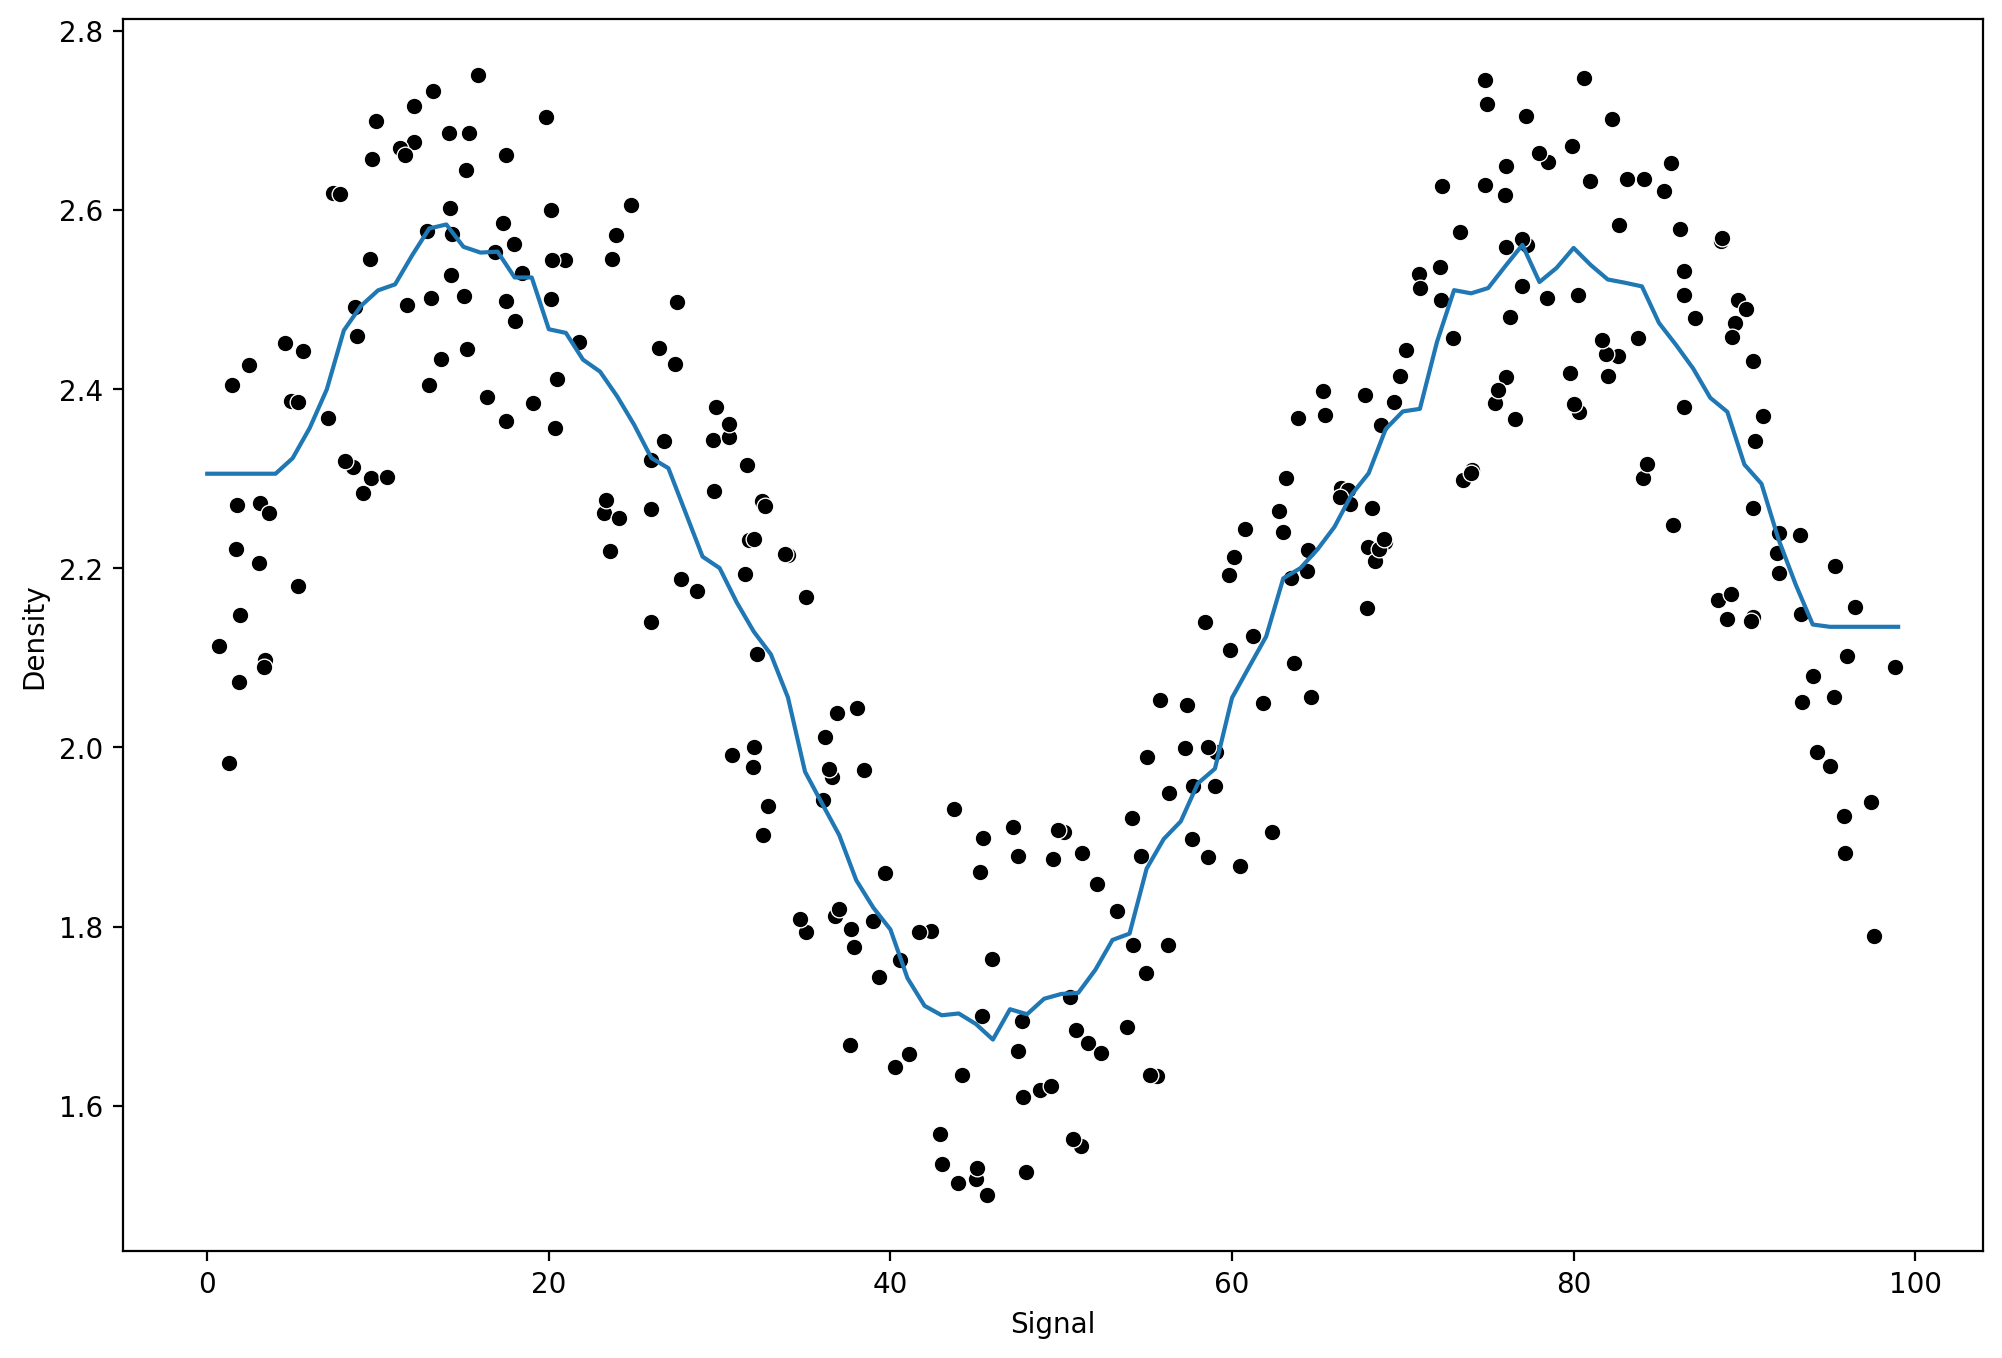

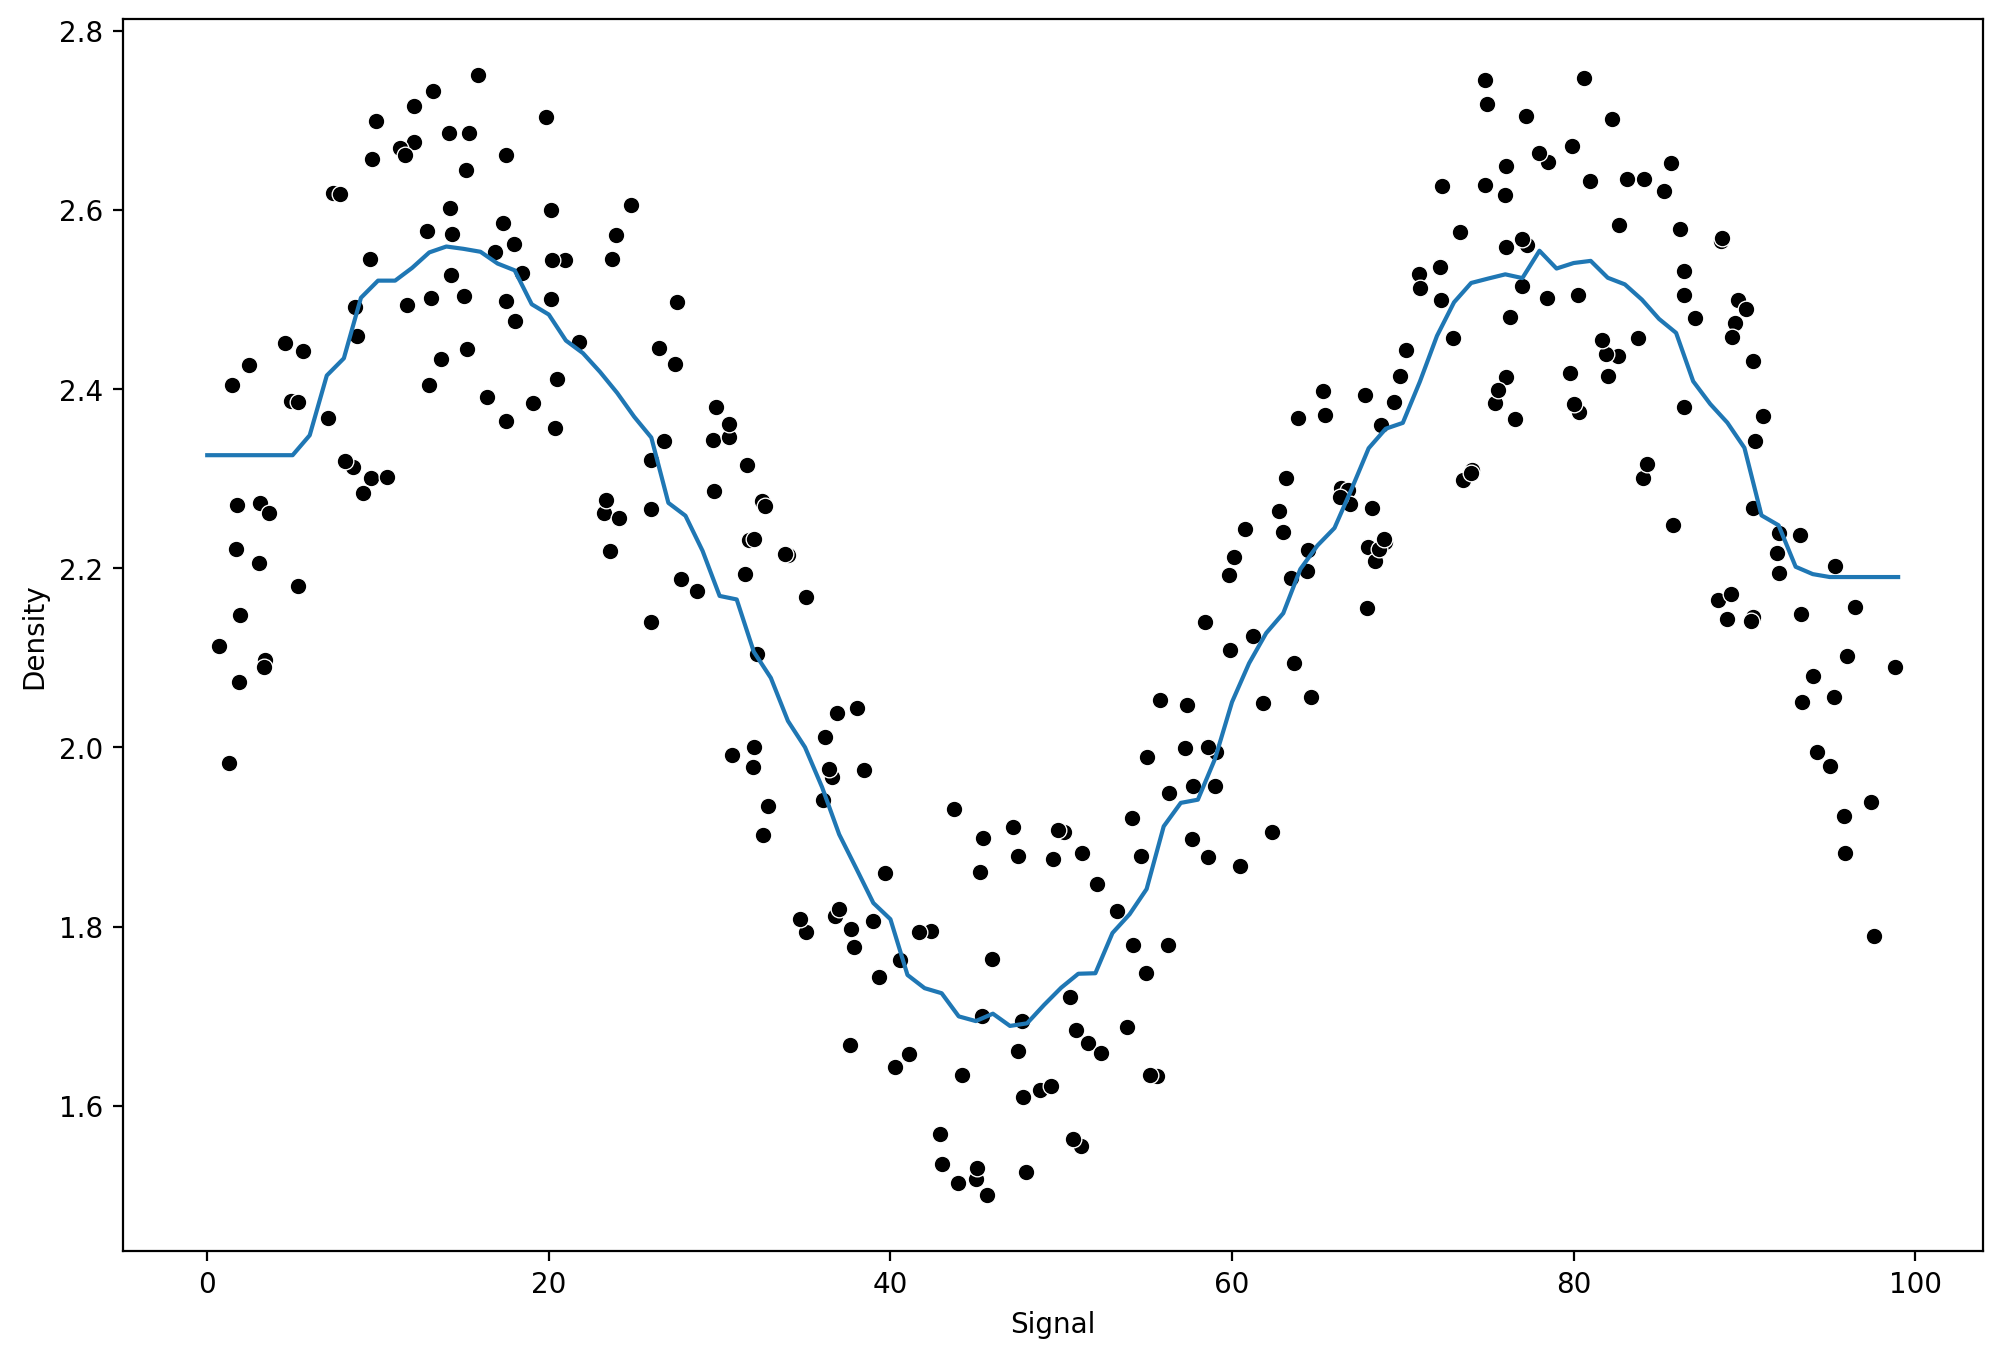

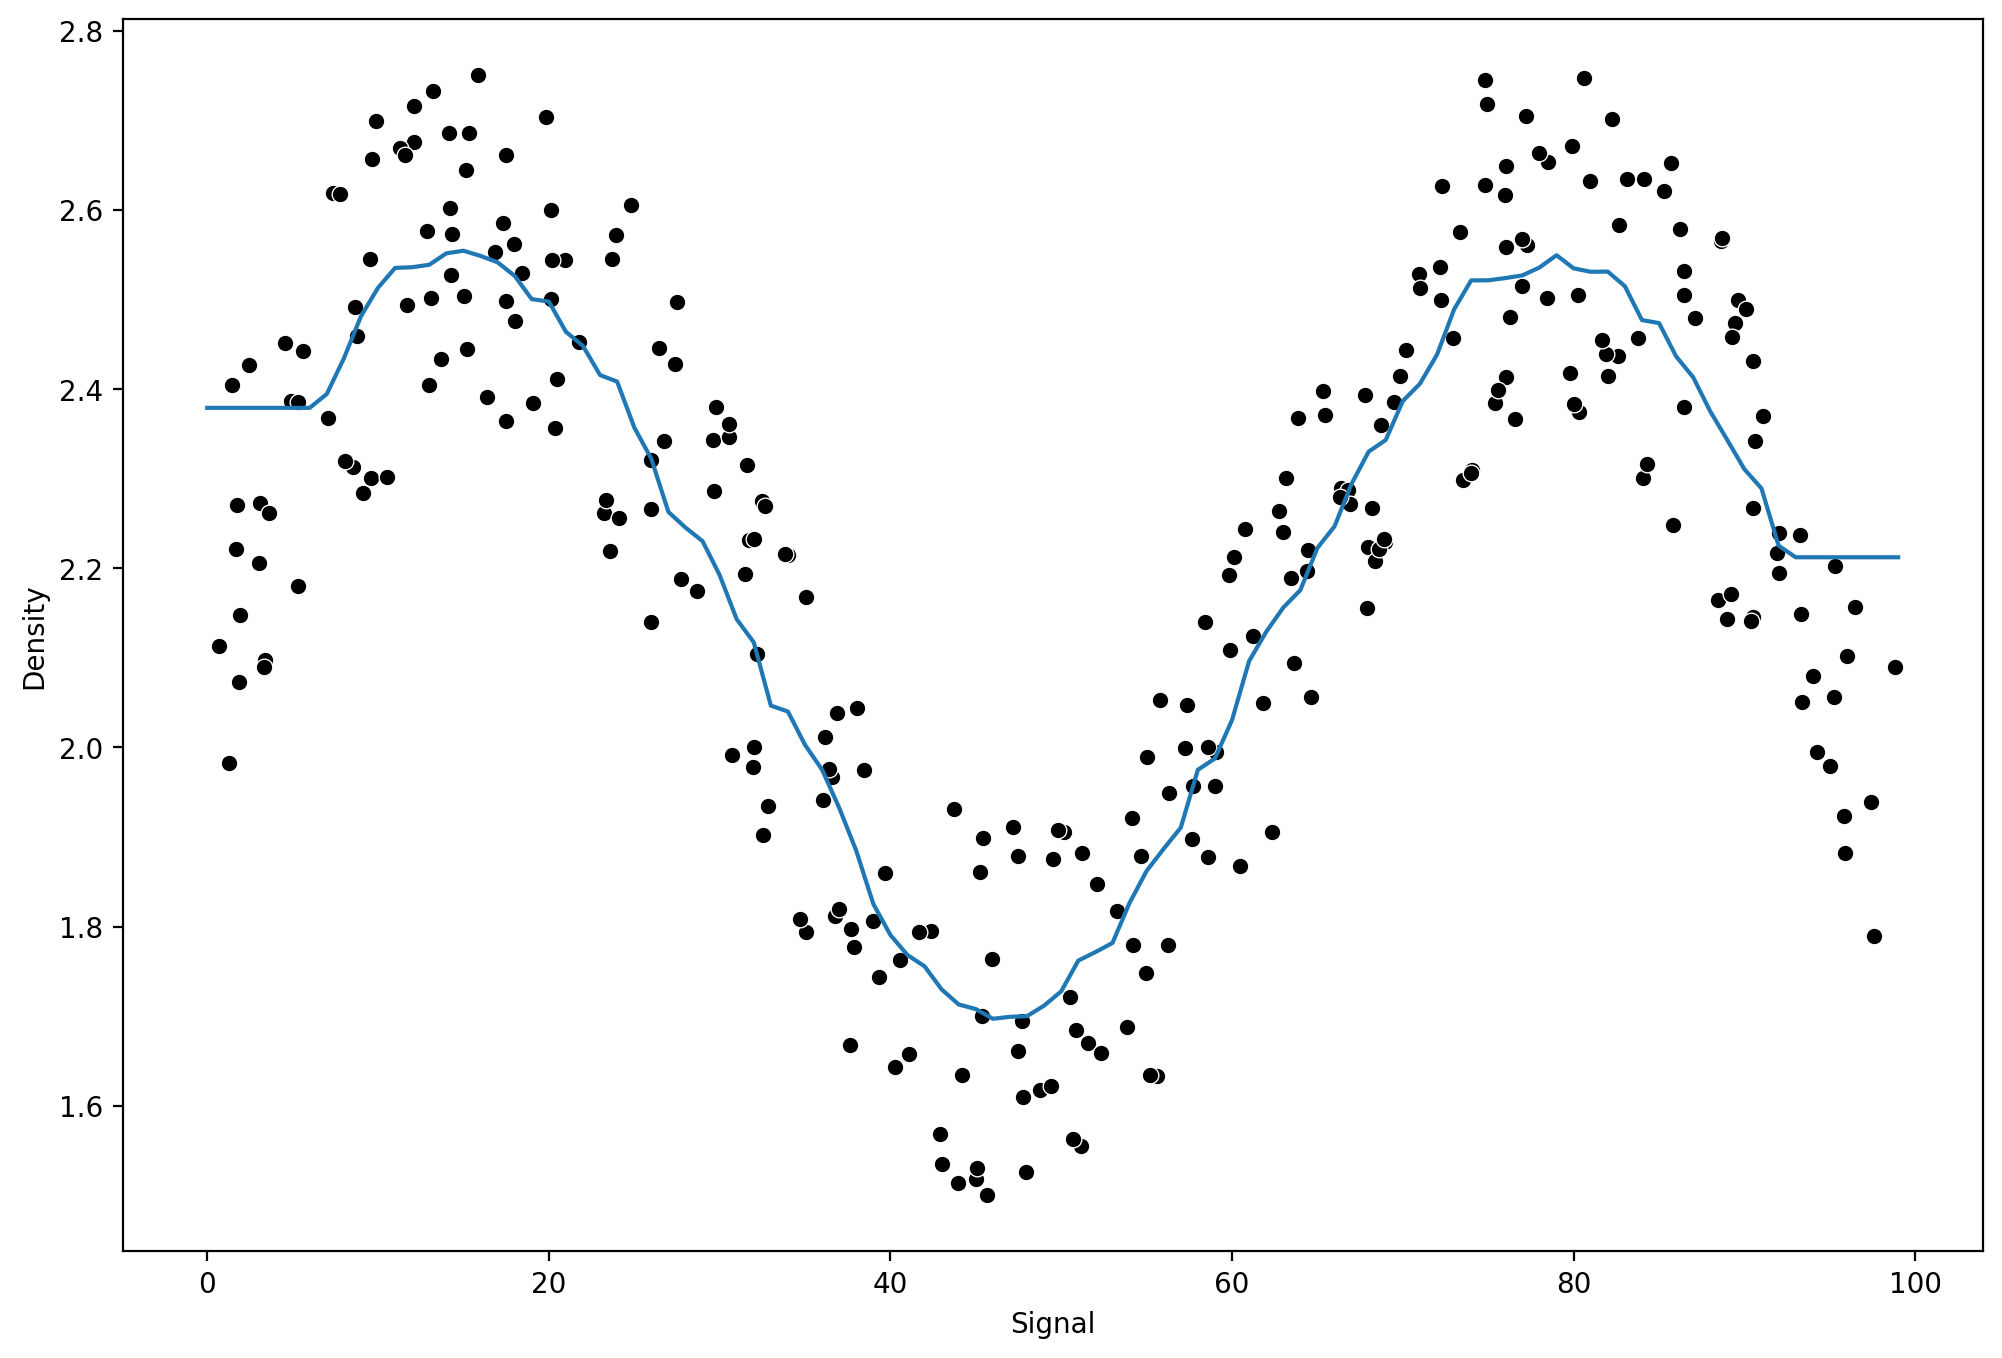

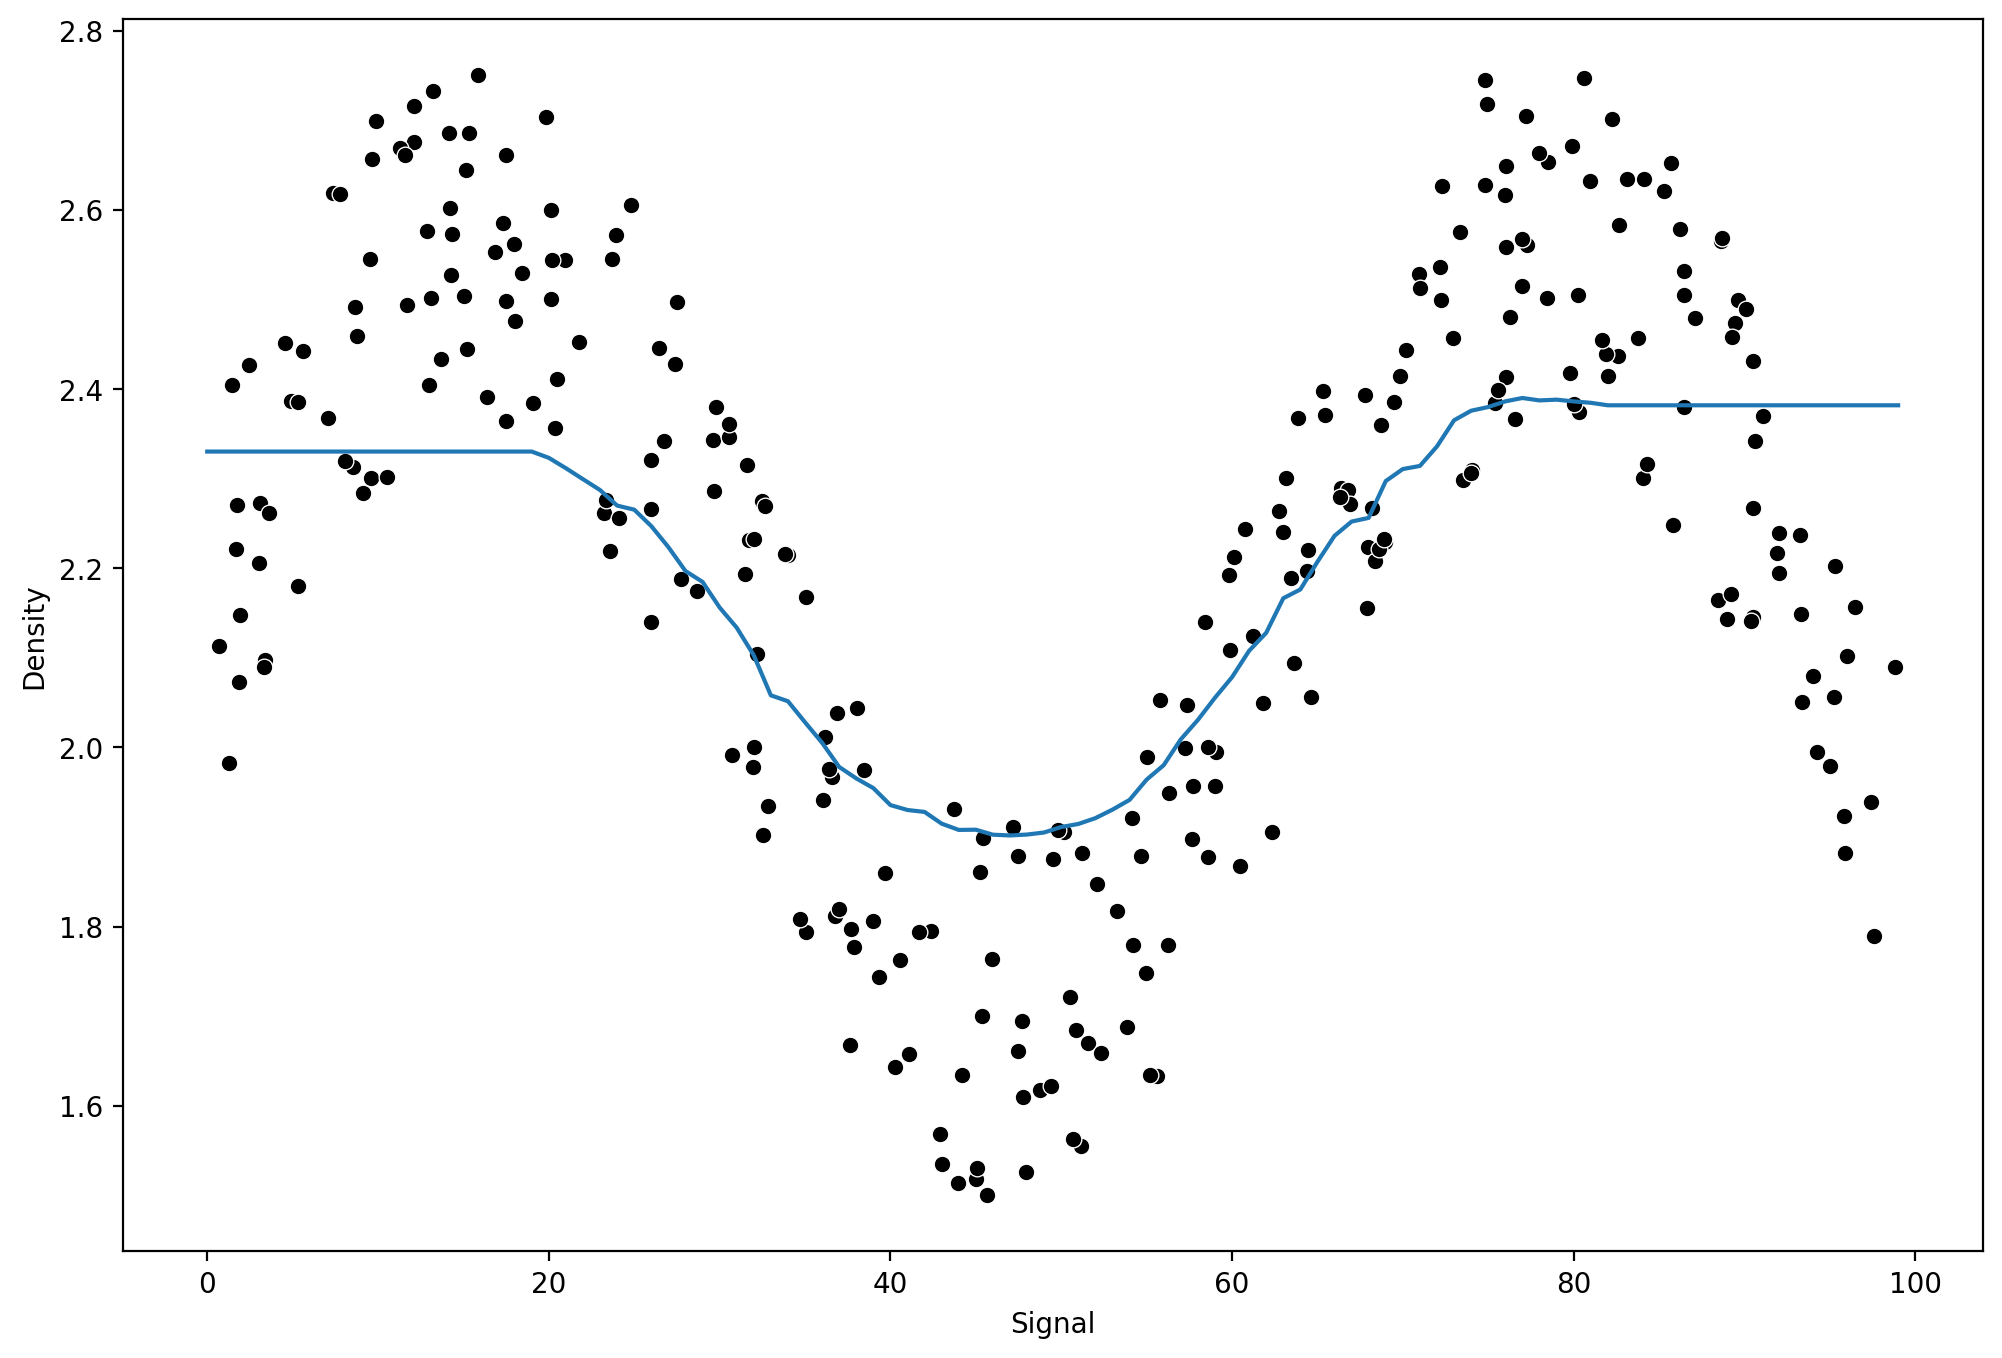

In [204]:
k_values = [1, 5, 10, 15, 20, 25, 30, 100]

for i in k_values:
    model = KNeighborsRegressor(n_neighbors=i)
    run_model(model, X_train, y_train, X_test, y_test)
    
# larger k has larger bias.

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


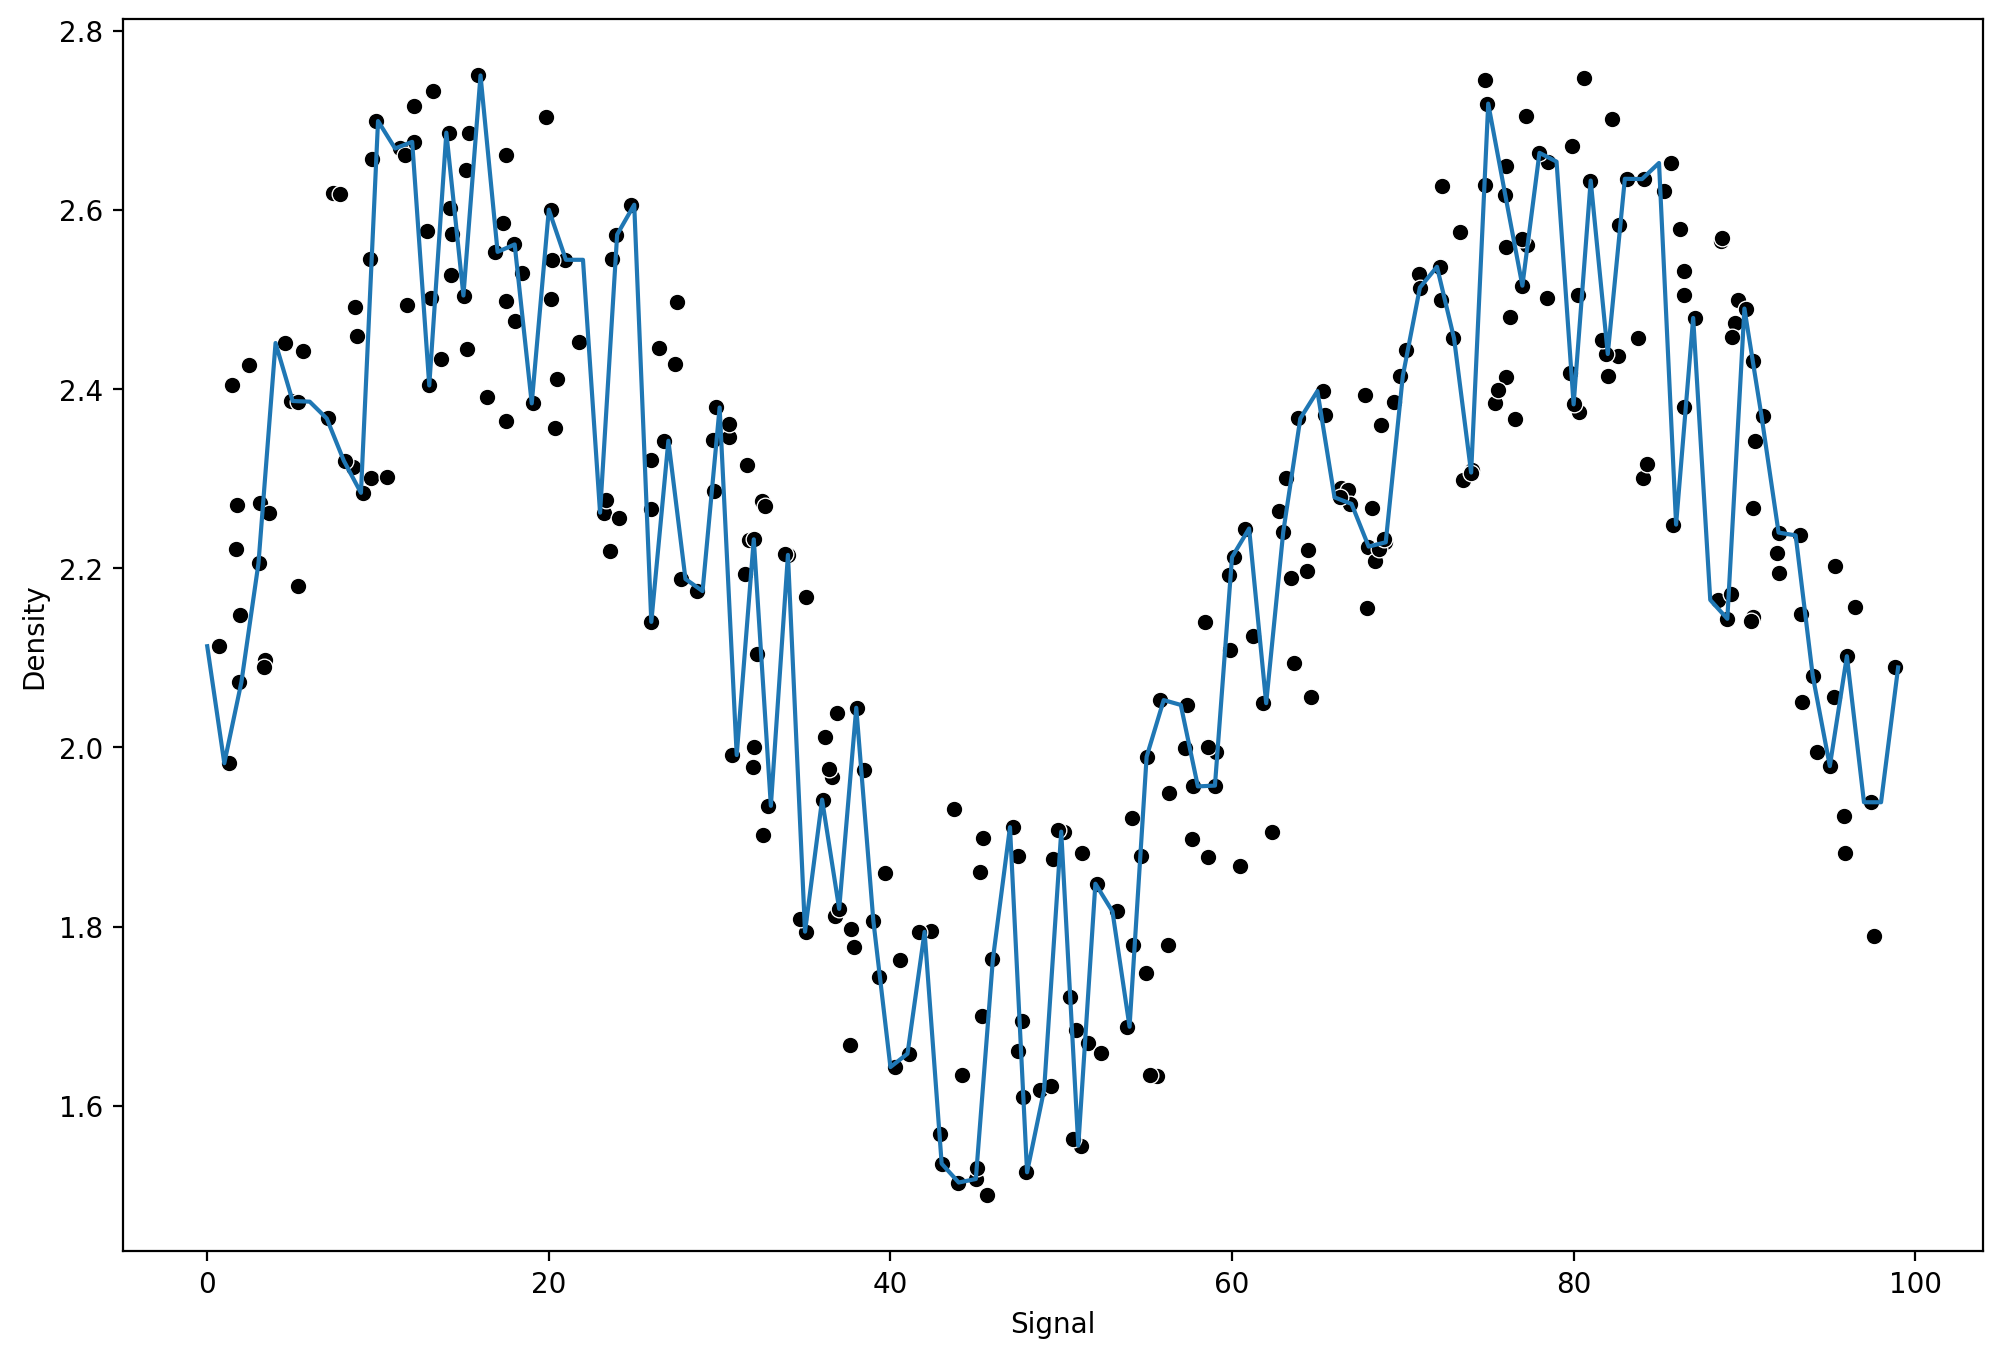

In [205]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [206]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [207]:
svr = SVR()

param_grid = {"C": [0.01, 0.1, 1, 5, 10, 100, 1000],
             "gamma":["auto", "scale"]}

grid = GridSearchCV(estimator=svr, param_grid=param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


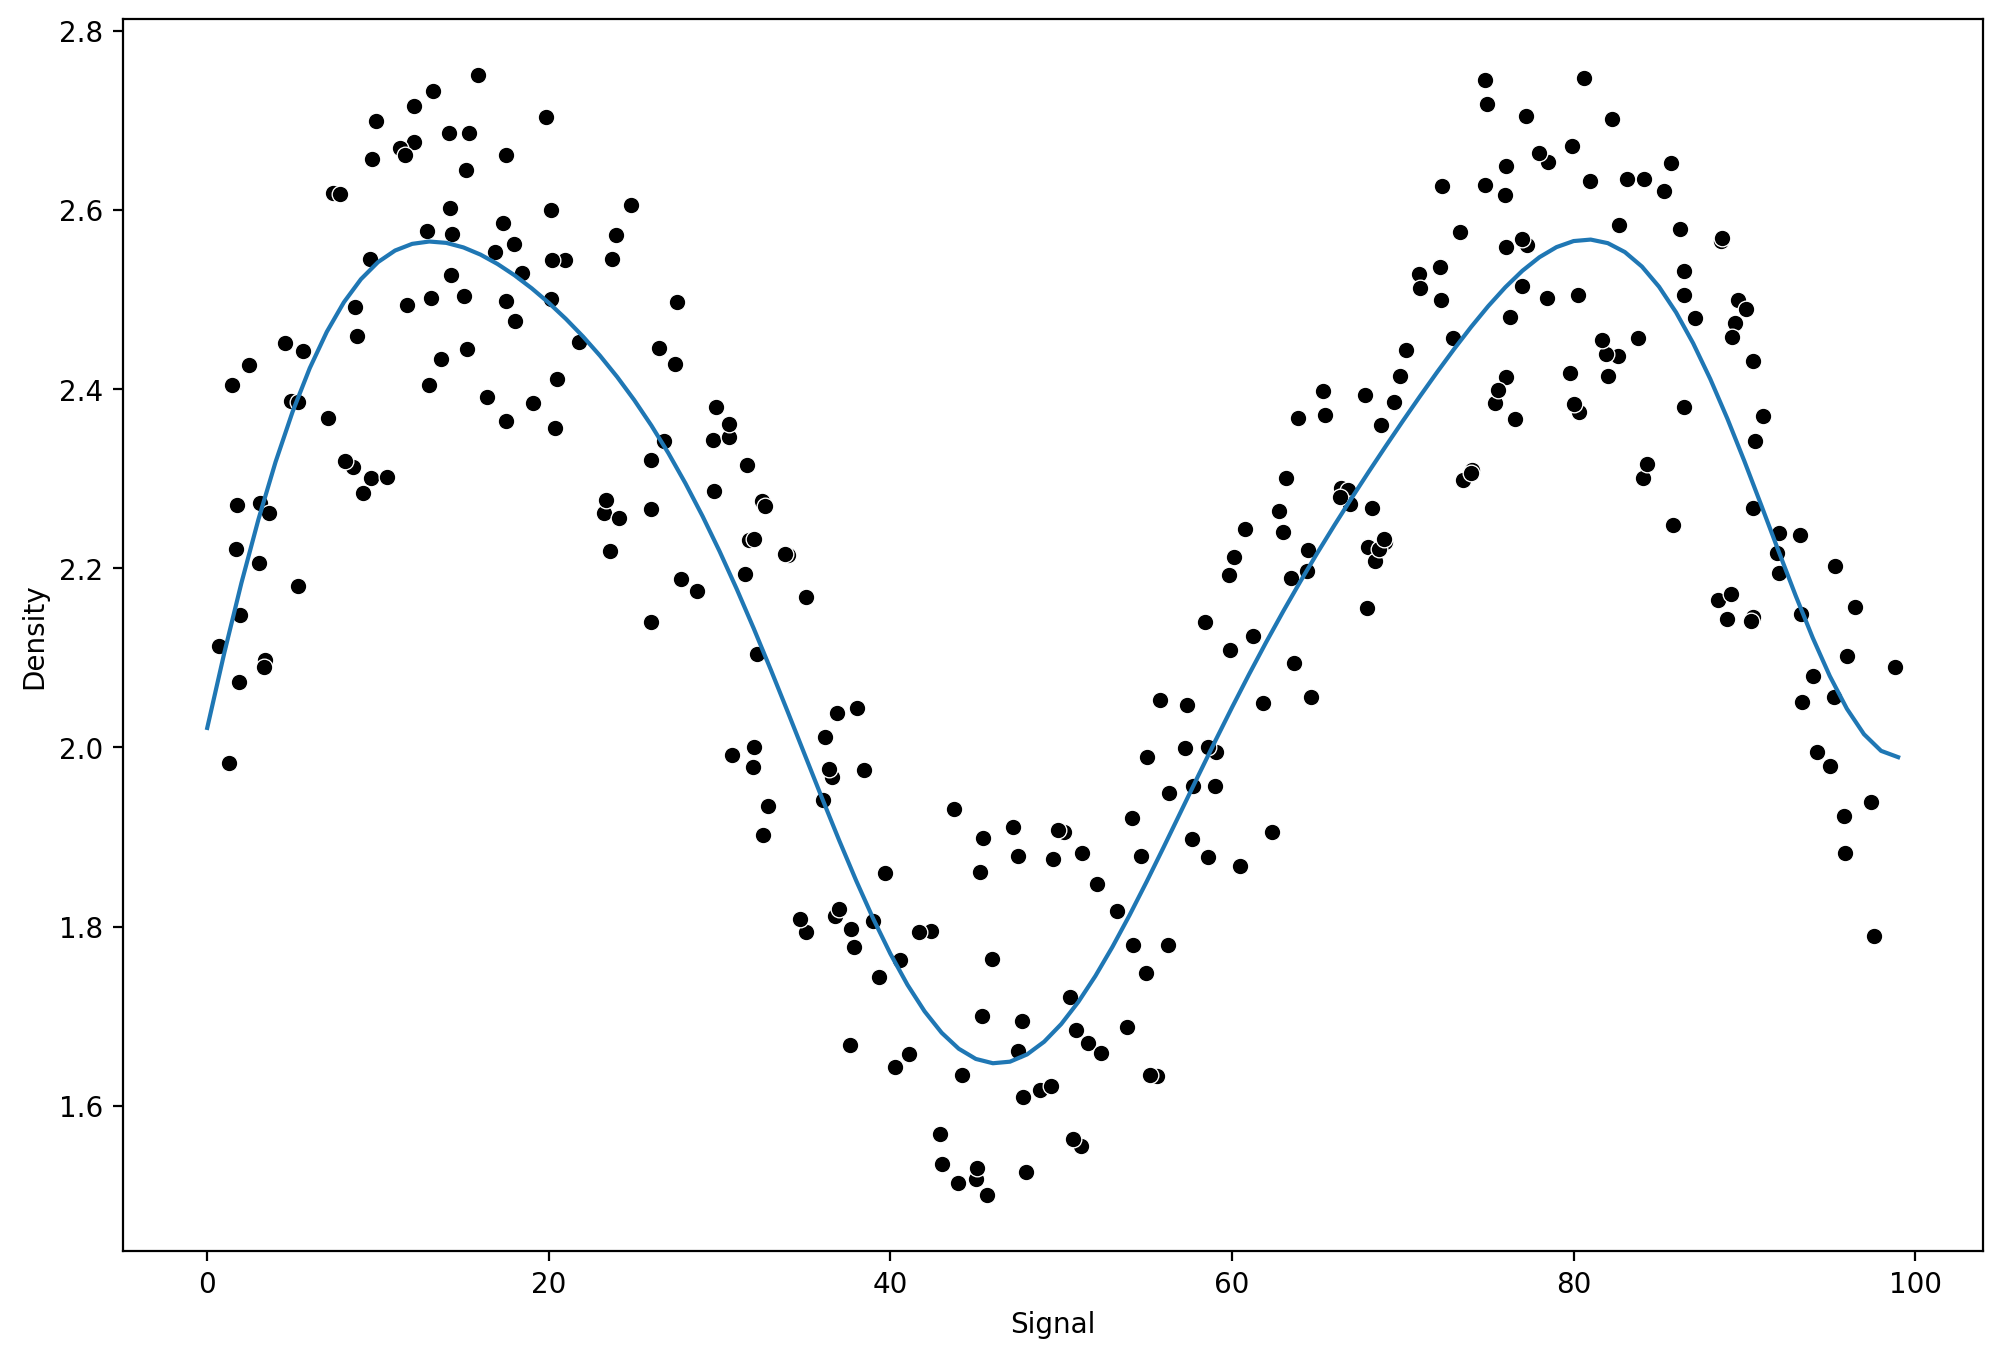

In [208]:
run_model(grid, X_train, y_train, X_test, y_test)

In [209]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.11660855056779594
RMSE: 0.1401177087729661


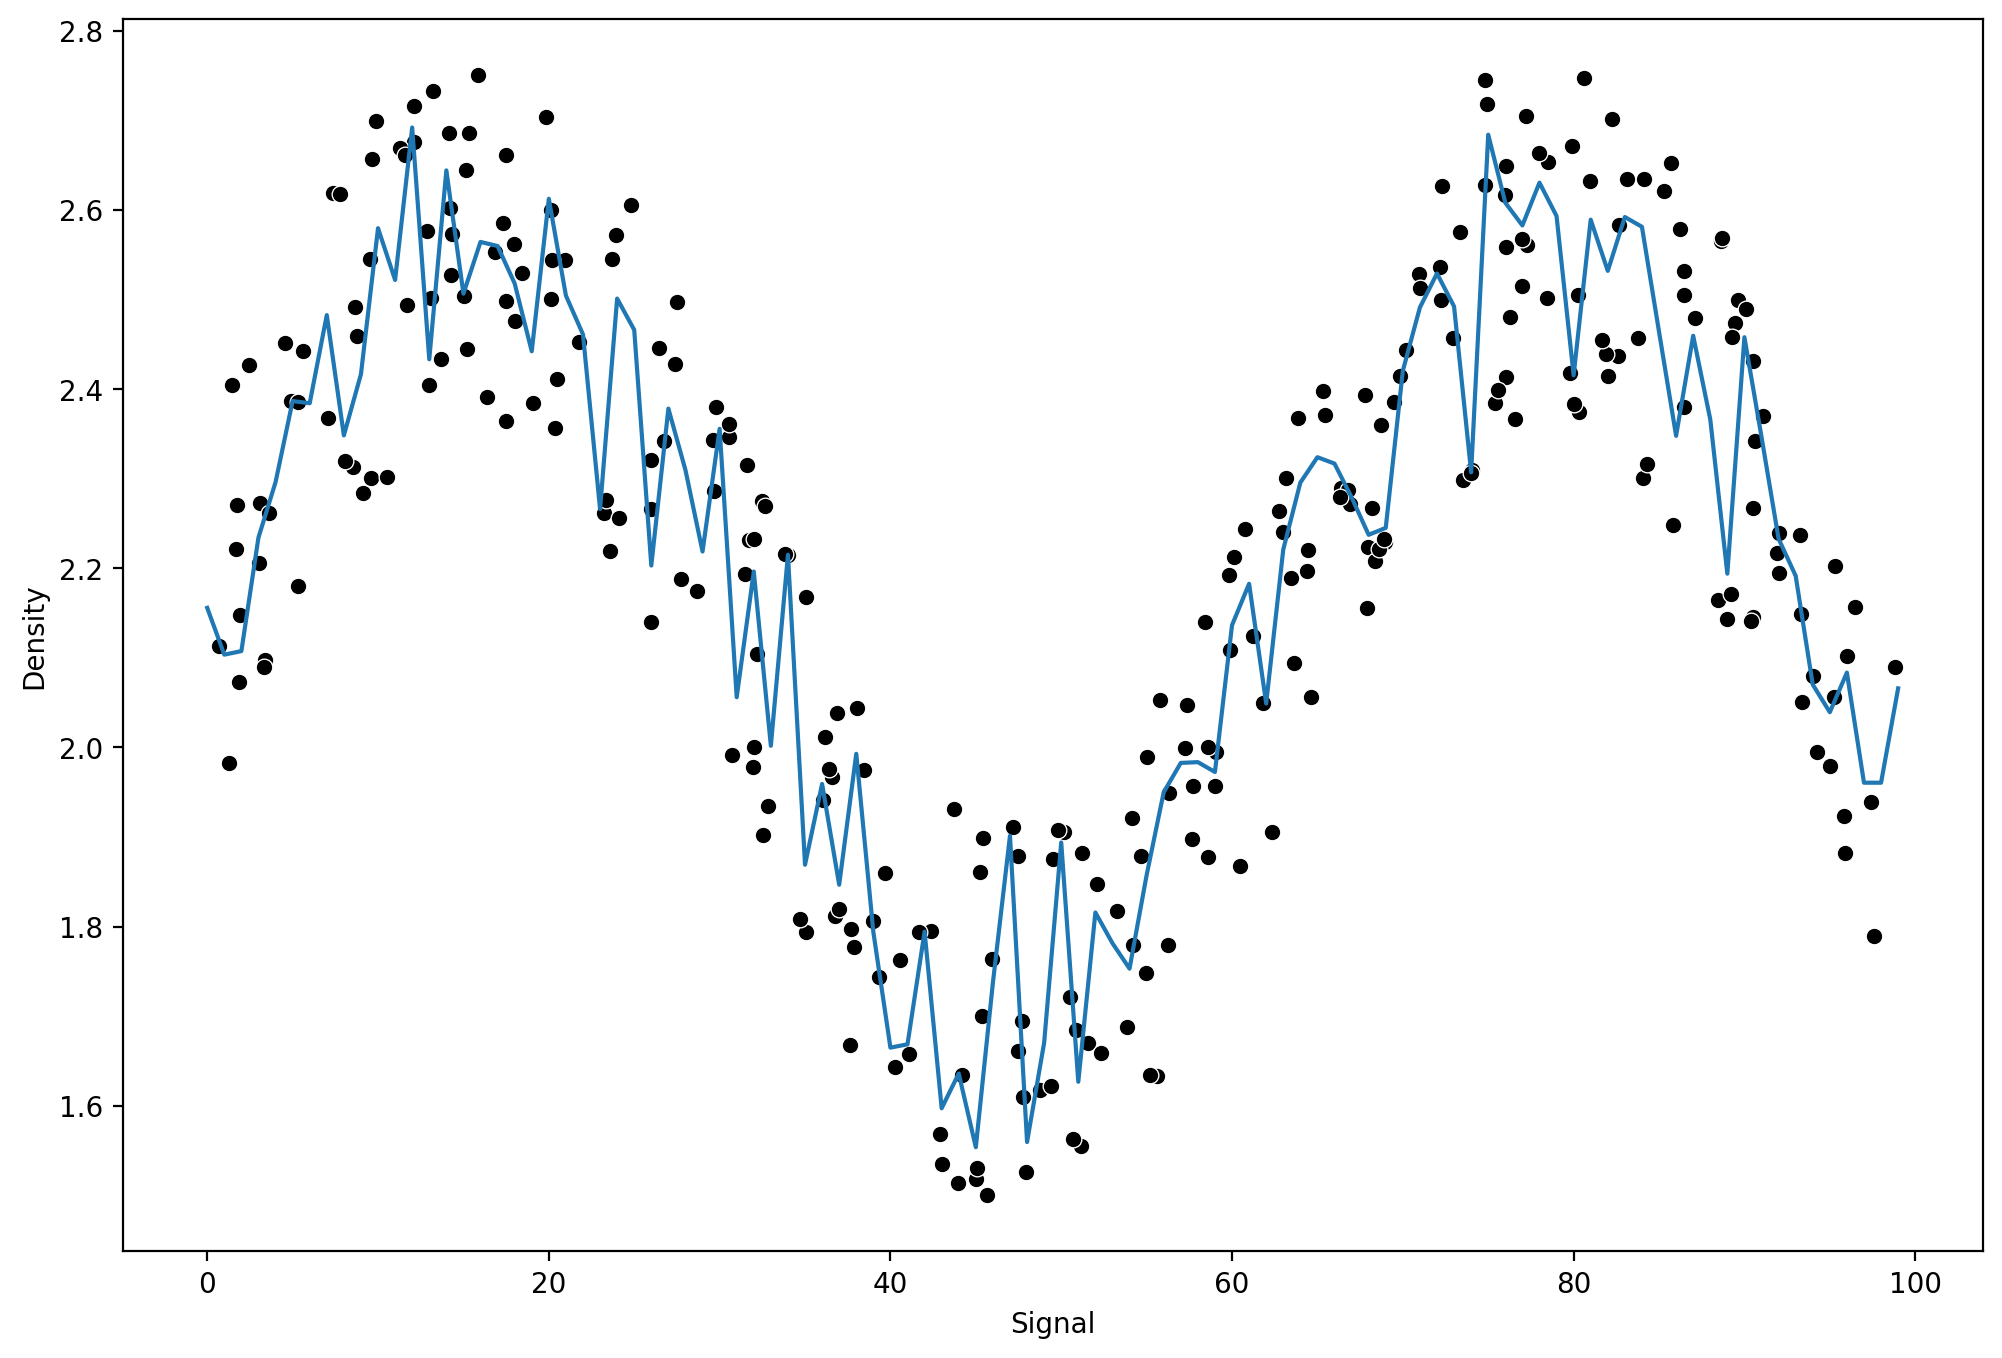

In [211]:
run_model(rfr, X_train, y_train, X_test, y_test)

MAE: 0.113946070572523
RMSE: 0.1337991911049849


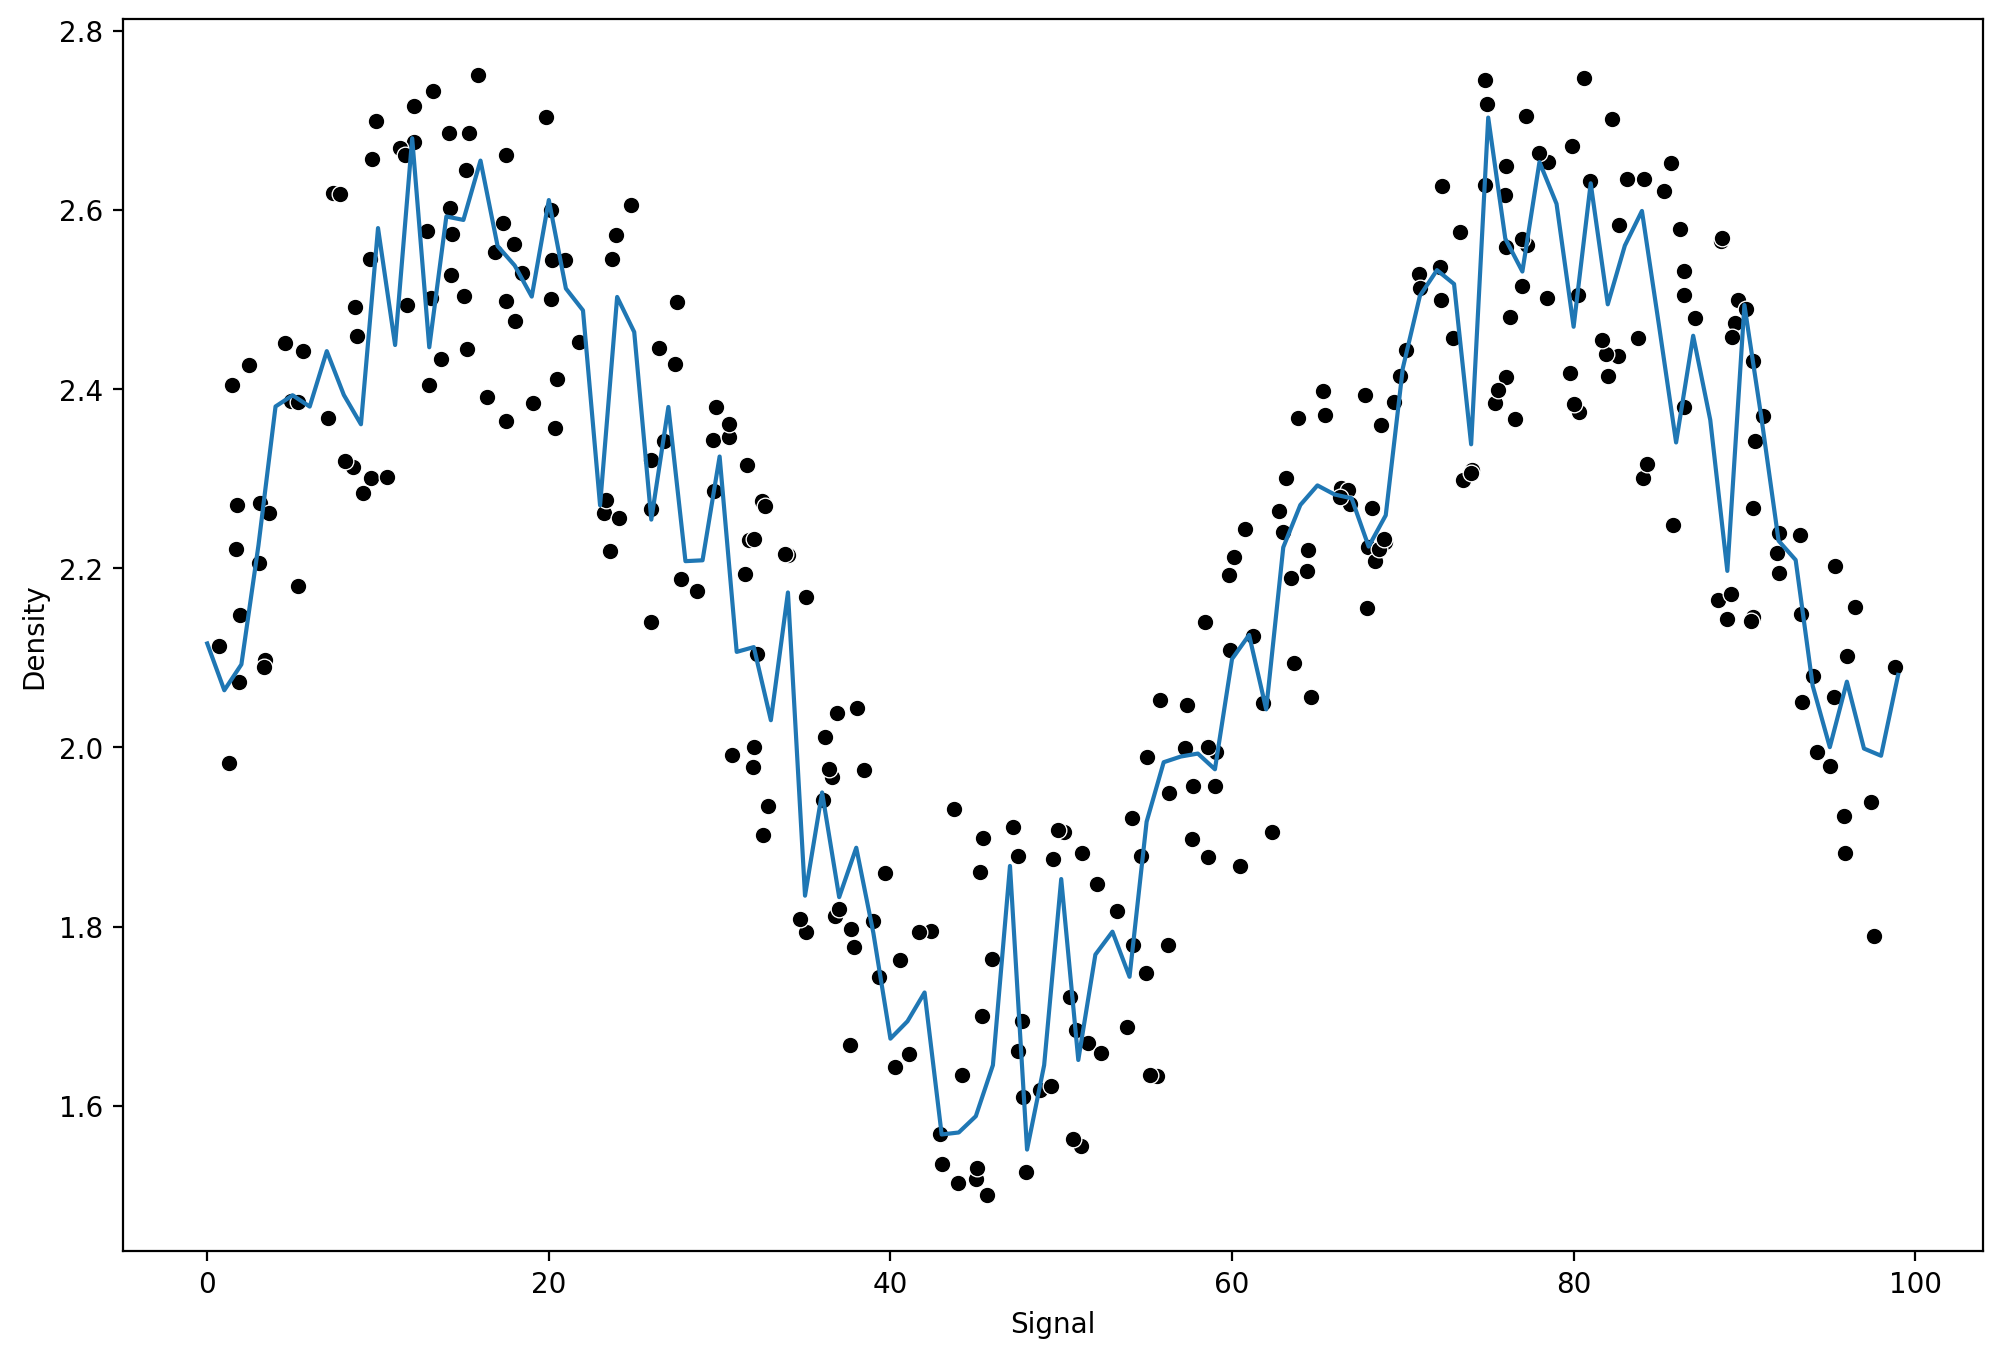

In [217]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train, y_train, X_test, y_test)

In [218]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


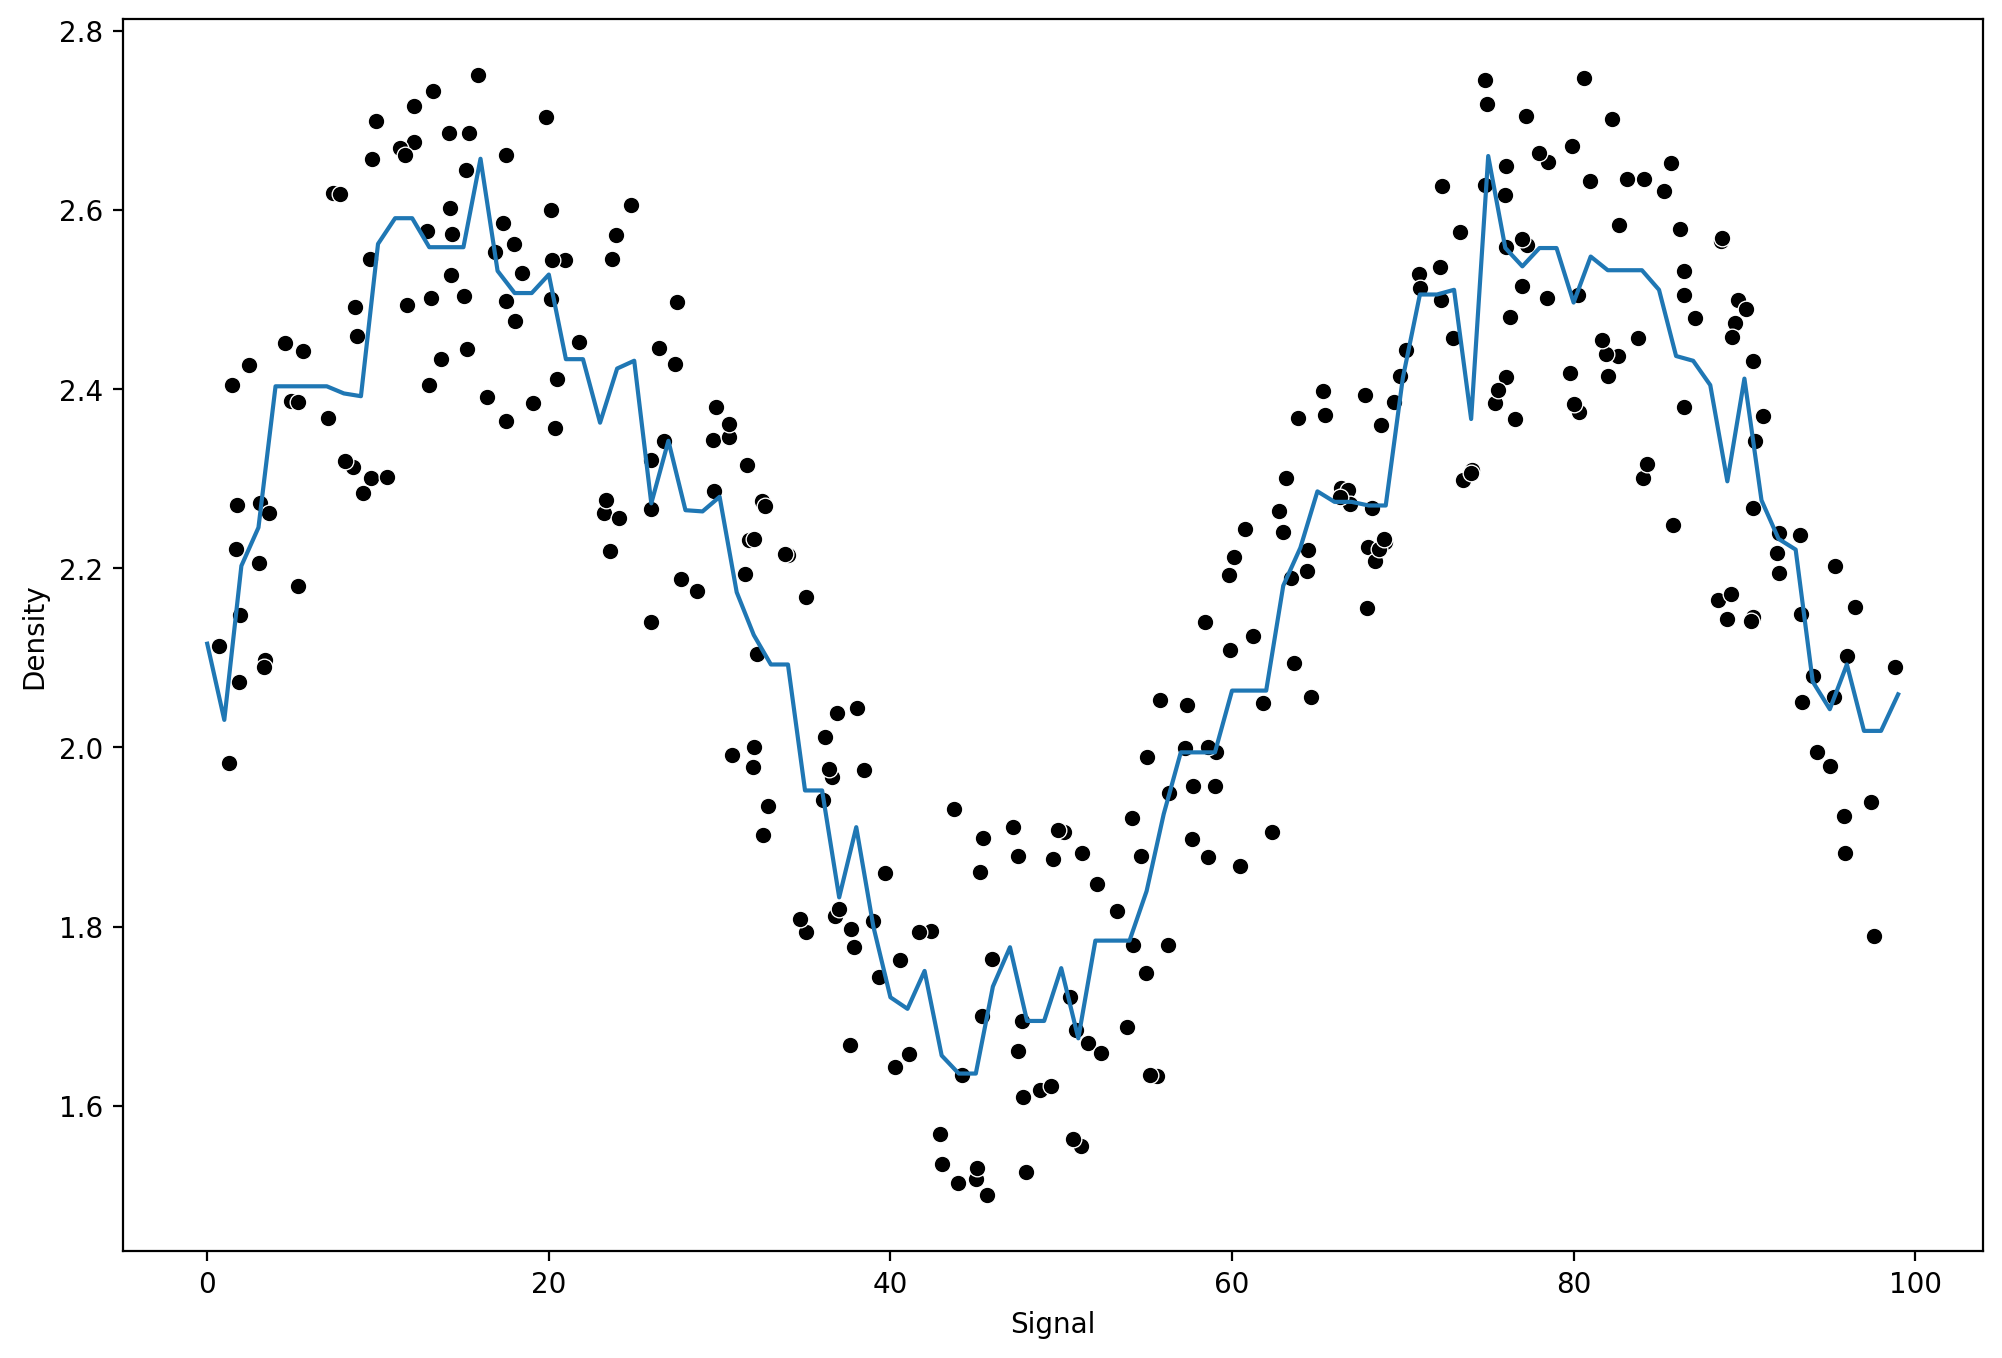

In [219]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11879374778296149
RMSE: 0.13692745326839378


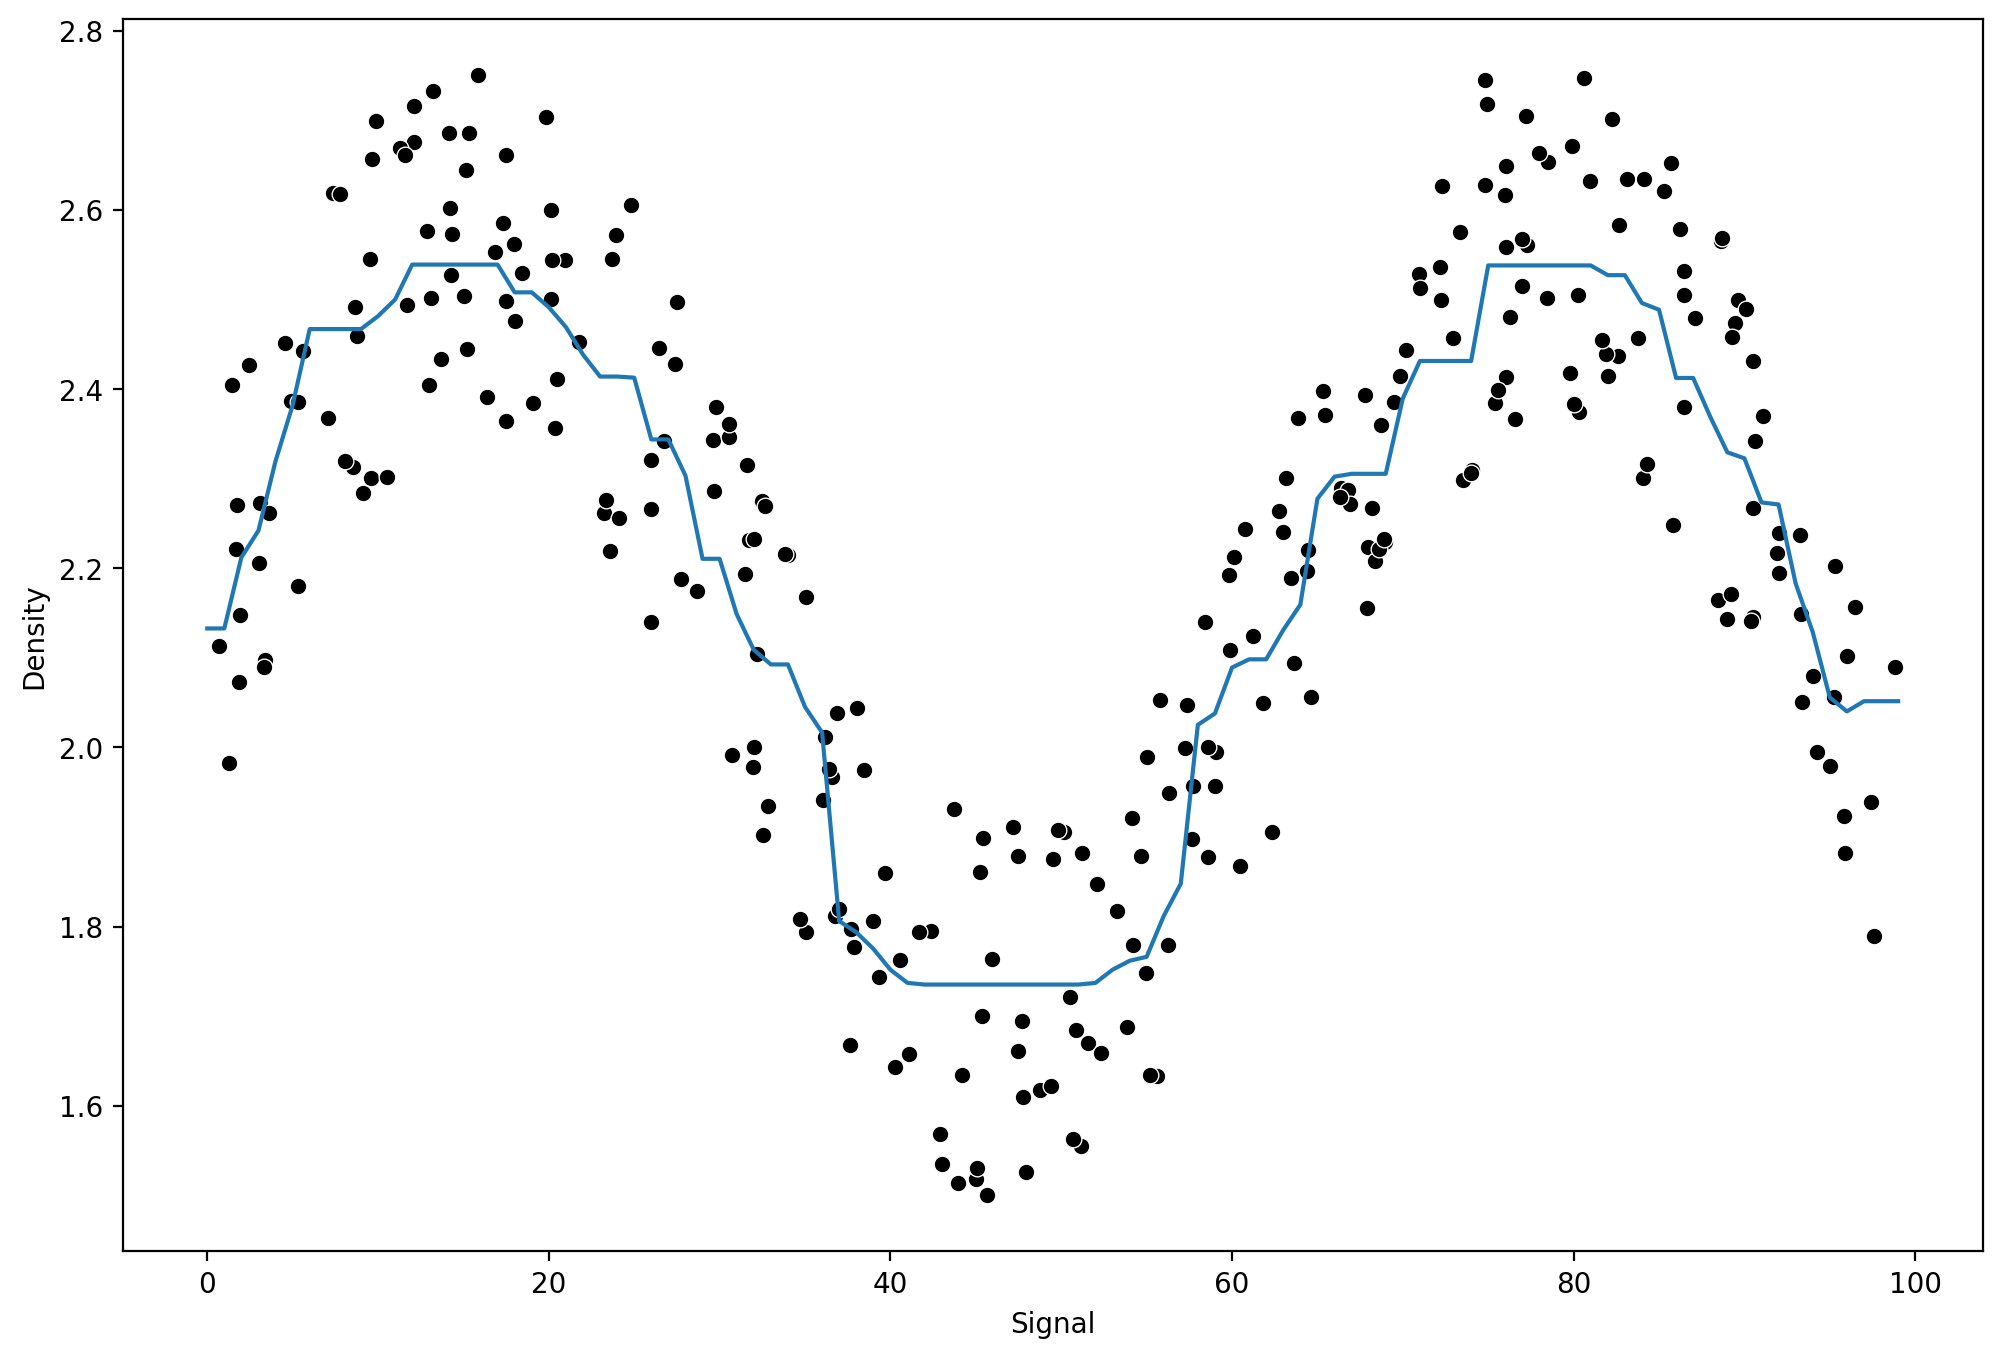

In [220]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)